1. Type of the data selected

The dataset consists of structured tabular data, specifically time-series and categorical numerical data.

- Structured Data: The dataset is well-organized into columns such as month, town, flat_type, resale_price, etc.
- Time-Series Component: The month column represents resale transactions over time, allowing for trend analysis.
- Categorical Variables: town, flat_type, and flat_model are categorical features.
- Numerical Variables: floor_area_sqm, lease_commence_date, storey_mid, remaining_lease_years, and resale_price are continuous numerical features.



---



2. Problem we are trying to address

The main problem we are addressing is the rising housing prices in Singapore and the need for better financial planning for homebuyers.

Key Challenges & Objectives:
-  Rising House Prices in Singapore: HDB resale prices have been increasing due to market demand, inflation, and government policies.
Many buyers struggle to afford a home or plan for future purchases.
-  Easier Financial Planning for Homebuyers: A predictive model can help forecast future prices based on historical trends and key property attributes.
Buyers can use this model to estimate costs based on factors like flat type, location, lease period, etc.
Helps in budgeting and loan planning, reducing financial uncertainty for buyers.
-  Data-Driven Decision Making: Policymakers can use these insights to implement housing policies that address affordability.
Investors can assess market trends to make informed real estate decisions.



---



In [ ]:
import torch
# For windows/linux will try CUDA first, then CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#set default device for following code, so we don't need to specify device every time
torch.set_default_device(device)

cpu


3. Data visualization

1. Load and view the data from HDB dataset

In [ ]:
import pandas as pd
#file_path = r"C:\content\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"
df = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

# Display basic info
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202109 entries, 0 to 202108
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                202109 non-null  object 
 1   town                 202109 non-null  object 
 2   flat_type            202109 non-null  object 
 3   block                202109 non-null  object 
 4   street_name          202109 non-null  object 
 5   storey_range         202109 non-null  object 
 6   floor_area_sqm       202109 non-null  float64
 7   flat_model           202109 non-null  object 
 8   lease_commence_date  202109 non-null  int64  
 9   remaining_lease      202109 non-null  object 
 10  resale_price         202109 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.0+ MB


(None,
      month        town flat_type block        street_name storey_range  \
 0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
 1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
 2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
 3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
 4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
 
    floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
 0            44.0        Improved                 1979  61 years 04 months   
 1            67.0  New Generation                 1978  60 years 07 months   
 2            67.0  New Generation                 1980  62 years 05 months   
 3            68.0  New Generation                 1980   62 years 01 month   
 4            67.0  New Generation                 1980  62 years 05 months   
 
    resale_price  
 0      232000.0  
 1      250000.0  
 2      

2. Information about the Data :



*   The dataset has 202002 rows and 11 columns
*   Key features relevant to predicting HDB resale price :

1.  month: The transaction date.
2.  town: The HDB town.
3.  flat_type: Type of flat (e.g., 2 ROOM, 3 ROOM, etc.).
4.  floor_area_sqm: Size of the flat.
5.  storey_range: Floor range.
6.  lease_commence_date: The year when the lease started.
7.  remaining_lease: Remaining lease duration.
8.  resale_price: Target variable (Price of the resale flat).


3. Data Cleaning and Preprocessing

- convert month to a datetime format
-extract the midpoint of storey range to get an approximate storey number instead of a range.
- convert remaining lease into total number of months and years
- drop unnecessary columns not required for visualisation
- check for missing values and clean them


In [ ]:
import numpy as np

# Convert 'month' to datetime format
df['month'] = pd.to_datetime(df['month'])

df['year'] = df['month'].dt.year.astype(int)

# Extract midpoint of storey range
def extract_storey_midpoint(storey_range):
    """Convert storey range (e.g., '04 TO 06') into a single approximate storey number."""
    range_values = storey_range.split(" TO ")
    if len(range_values) == 2:
        return (int(range_values[0]) + int(range_values[1])) / 2
    return int(range_values[0])  # In case of a single value

df['storey_mid'] = df['storey_range'].apply(extract_storey_midpoint)

# Convert 'remaining_lease' to numerical format (years)
def convert_remaining_lease(lease_str):
    """Extracts total lease years from 'XX years YY months'."""
    parts = lease_str.split(" ")
    years = int(parts[0])  # Extract the years part
    months = int(parts[2]) if "months" in lease_str else 0  # Extract months if available
    return years + (months / 12)  # Convert months to fraction of a year

df['remaining_lease_years'] = df['remaining_lease'].apply(convert_remaining_lease)

# Drop unnecessary columns
df_cleaned = df.drop(columns=['block', 'street_name', 'storey_range', 'remaining_lease'])

# Show cleaned data info
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202109 entries, 0 to 202108
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   month                  202109 non-null  datetime64[ns]
 1   town                   202109 non-null  object        
 2   flat_type              202109 non-null  object        
 3   floor_area_sqm         202109 non-null  float64       
 4   flat_model             202109 non-null  object        
 5   lease_commence_date    202109 non-null  int64         
 6   resale_price           202109 non-null  float64       
 7   year                   202109 non-null  int64         
 8   storey_mid             202109 non-null  float64       
 9   remaining_lease_years  202109 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 15.4+ MB


(None,
        month        town flat_type  floor_area_sqm      flat_model  \
 0 2017-01-01  ANG MO KIO    2 ROOM            44.0        Improved   
 1 2017-01-01  ANG MO KIO    3 ROOM            67.0  New Generation   
 2 2017-01-01  ANG MO KIO    3 ROOM            67.0  New Generation   
 3 2017-01-01  ANG MO KIO    3 ROOM            68.0  New Generation   
 4 2017-01-01  ANG MO KIO    3 ROOM            67.0  New Generation   
 
    lease_commence_date  resale_price  year  storey_mid  remaining_lease_years  
 0                 1979      232000.0  2017        11.0              61.333333  
 1                 1978      250000.0  2017         2.0              60.583333  
 2                 1980      262000.0  2017         2.0              62.416667  
 3                 1980      265000.0  2017         5.0              62.000000  
 4                 1980      265000.0  2017         2.0              62.416667  )

# Data Visualisation

4. Data visualization

(i) Distribution of HDB Resale Prices - **Histogram ( Distribution plot)**

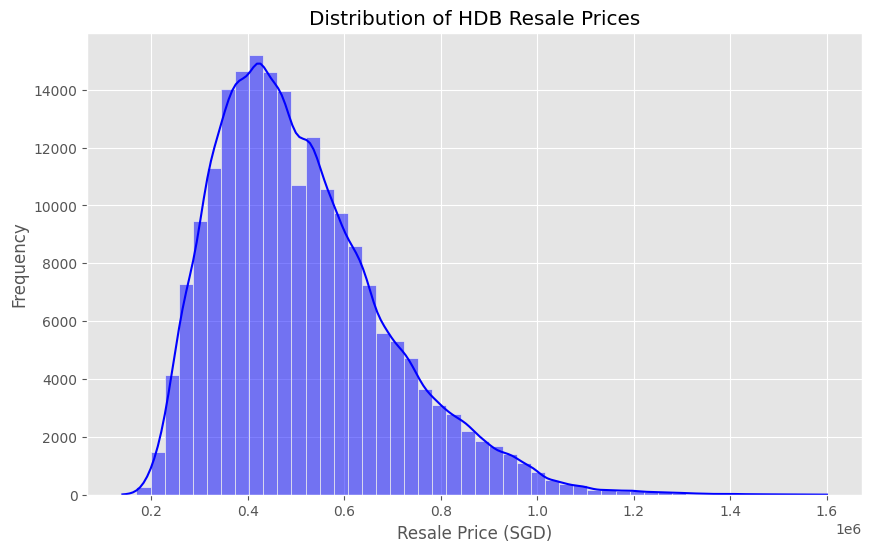

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot stye
plt.style.use("ggplot")

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["resale_price"], bins=50, kde=True, color="blue")
plt.xlabel("Resale Price (SGD)")
plt.ylabel("Frequency")
plt.title("Distribution of HDB Resale Prices")
plt.show()

(ii) HDB resale price trend over time **(Line chart)**

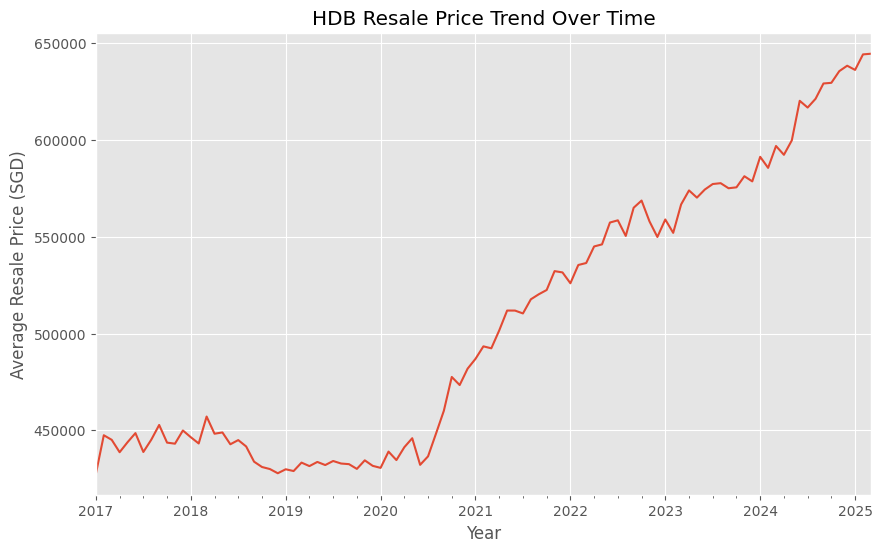

In [ ]:
plt.figure(figsize=(10, 6))
df_cleaned.groupby("month")["resale_price"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Average Resale Price (SGD)")
plt.title("HDB Resale Price Trend Over Time")
plt.show()

(iii) Resale Price by Town -**Box plot**

<ipython-input-10-8b7527b06ec1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="town", y="resale_price", data=df_cleaned[df_cleaned["town"].isin(top_towns)],palette="tab10")


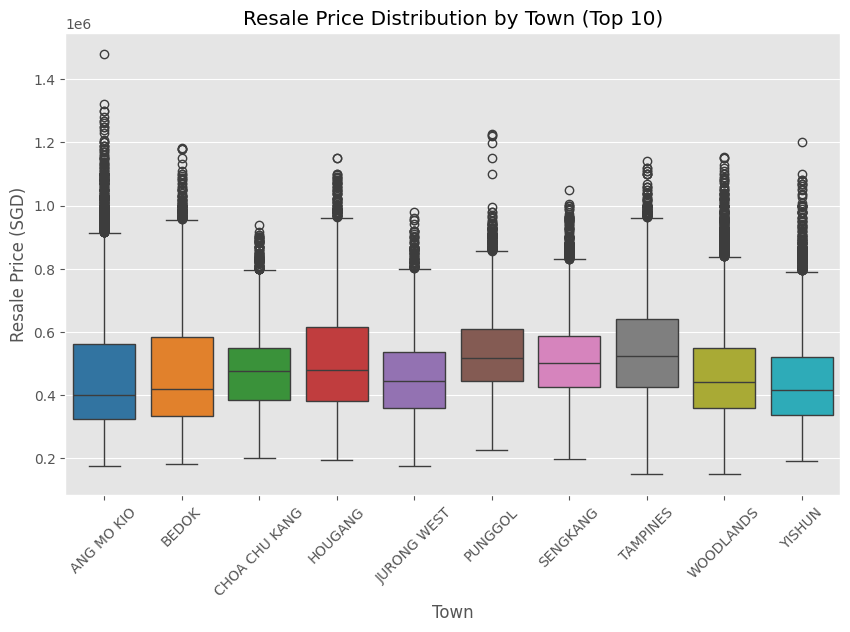

In [ ]:
plt.figure(figsize=(10, 6))
top_towns = df_cleaned["town"].value_counts().head(10).index
sns.boxplot(x="town", y="resale_price", data=df_cleaned[df_cleaned["town"].isin(top_towns)],palette="tab10")
plt.xticks(rotation=45)
plt.xlabel("Town")
plt.ylabel("Resale Price (SGD)")
plt.title("Resale Price Distribution by Town (Top 10)")
plt.show()

(iv) Impact of floor Area on Price **-Scatter Plot**

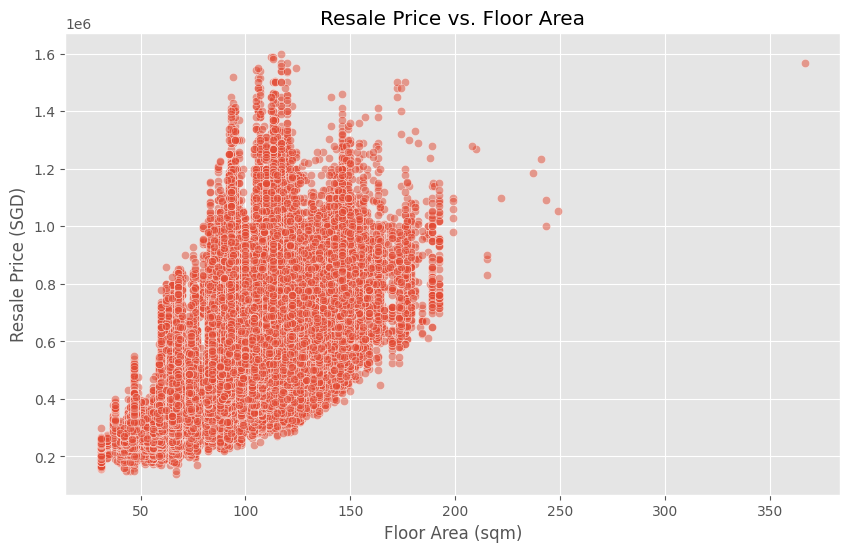

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="floor_area_sqm", y="resale_price", data=df_cleaned, alpha=0.5)
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price (SGD)")
plt.title("Resale Price vs. Floor Area")
plt.show()

(v) Remaining Lease vs Price -**Scatter Plot**

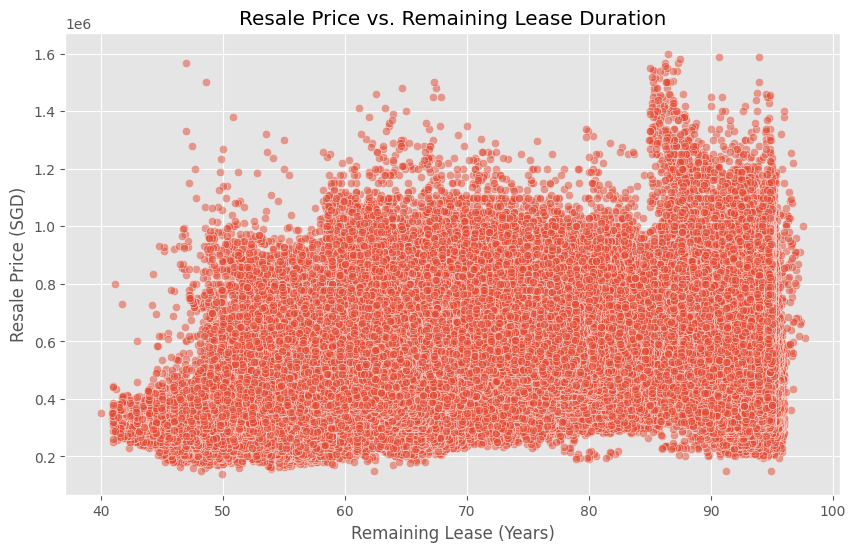

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="remaining_lease_years", y="resale_price", data=df_cleaned, alpha=0.5)
plt.xlabel("Remaining Lease (Years)")
plt.ylabel("Resale Price (SGD)")
plt.title("Resale Price vs. Remaining Lease Duration")
plt.show()



---



# Linear and Multiple Linear Regression

4. Naive model implemented based on one dataset

Linear Regression Model:
Resale Price = -127256.21 + (4161.16 * Floor Area) + (3160.80 * Remaining Lease Years)
R-squared (R²): 0.4037
Root Mean Squared Error (RMSE): 138670.89


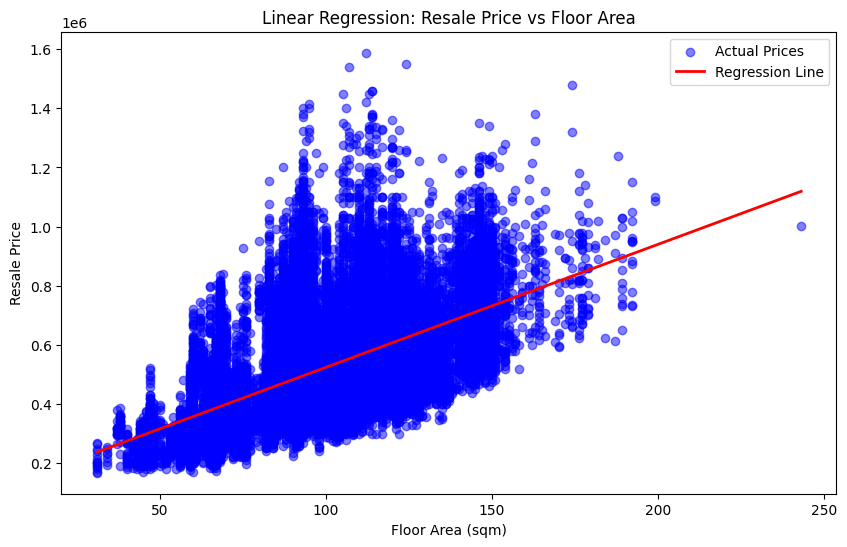

R^2 Score: 0.4037
RMSE: 138670.8851


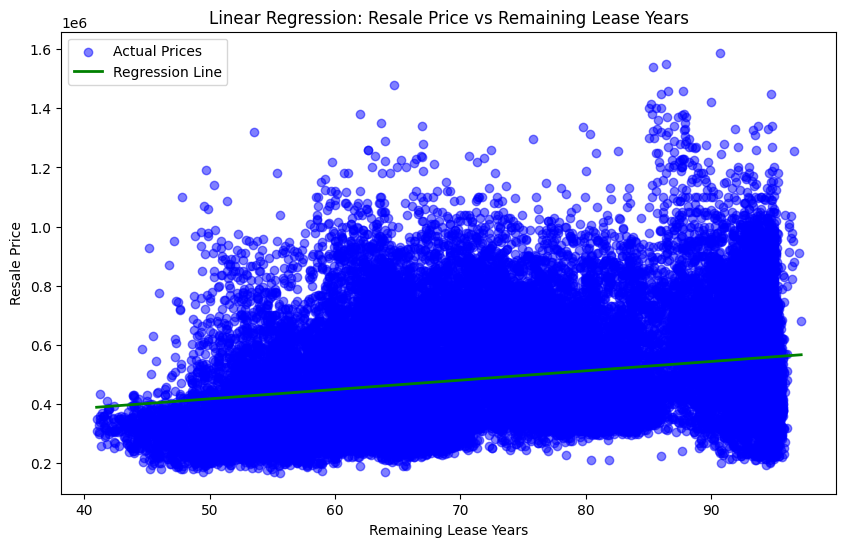


Linear Regression Model for Town:
Resale Price = 465303.54 + (3162.03 * town_BEDOK) + (227736.43 * town_BISHAN) + (21292.28 * town_BUKIT BATOK) + (157274.03 * town_BUKIT MERAH) + (24560.48 * town_BUKIT PANJANG) + (280925.99 * town_BUKIT TIMAH) + (206722.95 * town_CENTRAL AREA) + (11763.51 * town_CHOA CHU KANG) + (75701.48 * town_CLEMENTI) + (30481.77 * town_GEYLANG) + (42856.11 * town_HOUGANG) + (374.65 * town_JURONG EAST) + (-14102.55 * town_JURONG WEST) + (111276.63 * town_KALLANG/WHAMPOA) + (81845.57 * town_MARINE PARADE) + (105097.06 * town_PASIR RIS) + (63533.78 * town_PUNGGOL) + (159170.69 * town_QUEENSTOWN) + (14938.14 * town_SEMBAWANG) + (48032.10 * town_SENGKANG) + (82182.02 * town_SERANGOON) + (77351.52 * town_TAMPINES) + (77666.87 * town_TOA PAYOH) + (-337.14 * town_WOODLANDS) + (-28077.51 * town_YISHUN)
R^2 Score for Town-based Model: 0.1064
RMSE for Town-based Model: 169753.6378


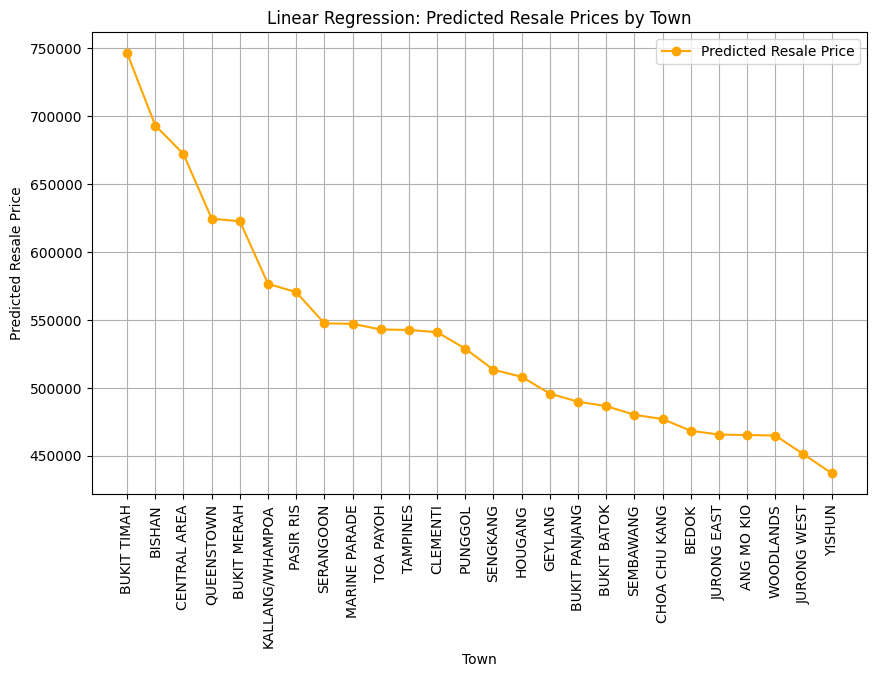

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is already defined
X = df_cleaned[['floor_area_sqm', 'remaining_lease_years']]
y = df_cleaned['resale_price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients
intercept = model.intercept_
coefficients = model.coef_

# Display the regression equation
equation = f"Resale Price = {intercept:.2f} + ({coefficients[0]:.2f} * Floor Area) + ({coefficients[1]:.2f} * Remaining Lease Years)"
print("Linear Regression Model:")
print(equation)

# Predict resale prices on test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ------ 2D Plot for Floor Area vs Resale Price ------
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X_test['floor_area_sqm'], y_test, color='blue', label="Actual Prices", alpha=0.5)

# Generate predictions for a range of floor areas (keeping lease years constant)
floor_area_range = np.linspace(X_test['floor_area_sqm'].min(), X_test['floor_area_sqm'].max(), 100)
fixed_lease_years = X_test['remaining_lease_years'].median()  # Use median lease years
predicted_prices = (coefficients[0] * floor_area_range) + (coefficients[1] * fixed_lease_years) + intercept

# Plot the regression line
plt.plot(floor_area_range, predicted_prices, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Resale Price vs Floor Area")
plt.legend()
plt.show()

# ------ 2D Plot for Remaining Lease Years vs Resale Price ------
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X_test['remaining_lease_years'], y_test, color='blue', label="Actual Prices", alpha=0.5)

# Generate predictions for a range of lease years (keeping floor area constant)
lease_years_range = np.linspace(X_test['remaining_lease_years'].min(), X_test['remaining_lease_years'].max(), 100)
fixed_floor_area = X_test['floor_area_sqm'].median()  # Use median floor area
predicted_prices = (coefficients[0] * fixed_floor_area) + (coefficients[1] * lease_years_range) + intercept

# Plot the regression line
plt.plot(lease_years_range, predicted_prices, color='green', linewidth=2, label="Regression Line")

y_pred = (coefficients[0] * X_test['floor_area_sqm']) + (coefficients[1] * X_test['remaining_lease_years']) + intercept

# Compute R-squared score
r2 = r2_score(y_test, y_pred)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Labels and title
plt.xlabel("Remaining Lease Years")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Resale Price vs Remaining Lease Years")
plt.legend()
plt.show()

# --- Step 2: Linear Regression with 'town' ---
X_town = pd.get_dummies(df_cleaned[['town']], drop_first=True)
y = df_cleaned['resale_price']

X_train_town, X_test_town, y_train_town, y_test_town = train_test_split(X_town, y, test_size=0.2, random_state=42)

model_town = LinearRegression()
model_town.fit(X_train_town, y_train_town)

intercept_town = model_town.intercept_
coefficients_town = model_town.coef_

equation_town = f"Resale Price = {intercept_town:.2f} + " + " + ".join([f"({coef:.2f} * {town})" for coef, town in zip(coefficients_town, X_town.columns)])
print("\nLinear Regression Model for Town:")
print(equation_town)

# Get predicted resale prices for each row in the dataset
town_predicted_prices = model_town.predict(X_town)

# Create a DataFrame to map towns to predicted resale prices
df_town_predicted = pd.DataFrame({
    "Town": df_cleaned['town'],
    "Predicted Price": town_predicted_prices
})

# Group by town and calculate the mean predicted price for each town
df_town_predicted = df_town_predicted.groupby('Town').mean().reset_index()

# Sort the towns based on the predicted price for better visualization
df_town_predicted = df_town_predicted.sort_values(by='Predicted Price', ascending=False)

# Compute R-squared score
r2_town = r2_score(y_test_town, model_town.predict(X_test_town))

# Compute RMSE
rmse_town = np.sqrt(mean_squared_error(y_test_town, model_town.predict(X_test_town)))

print(f"R^2 Score for Town-based Model: {r2_town:.4f}")
print(f"RMSE for Town-based Model: {rmse_town:.4f}")

# Create the plot for Towns and Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(df_town_predicted['Town'], df_town_predicted['Predicted Price'], marker='o', linestyle='-', color='orange', label="Predicted Resale Price")
plt.xlabel("Town")
plt.ylabel("Predicted Resale Price")
plt.title("Linear Regression: Predicted Resale Prices by Town")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Group by flat type and calculate mean and median resale prices
df_price_comparison = df_cleaned.groupby('flat_type')['resale_price'].agg(['mean', 'median']).reset_index()

# Rename columns for clarity
df_price_comparison.columns = ['Flat Type', 'Mean Price', 'Median Price']

# Display the DataFrame
print(df_price_comparison)

          Flat Type     Mean Price  Median Price
0            1 ROOM  207738.894737      205000.0
1            2 ROOM  288312.514345      285000.0
2            3 ROOM  361693.867251      345000.0
3            4 ROOM  513745.109867      485000.0
4            5 ROOM  608788.716682      585000.0
5         EXECUTIVE  715051.584274      700000.0
6  MULTI-GENERATION  842086.750000      840000.0


**Linear Regression: Predicted vs Actual Resale Prices by Year**

[27806.72370389]
27806.72370388961

Linear Regression Model for Year:
Resale Price = -55681473.98 + (27806.72 * Year)


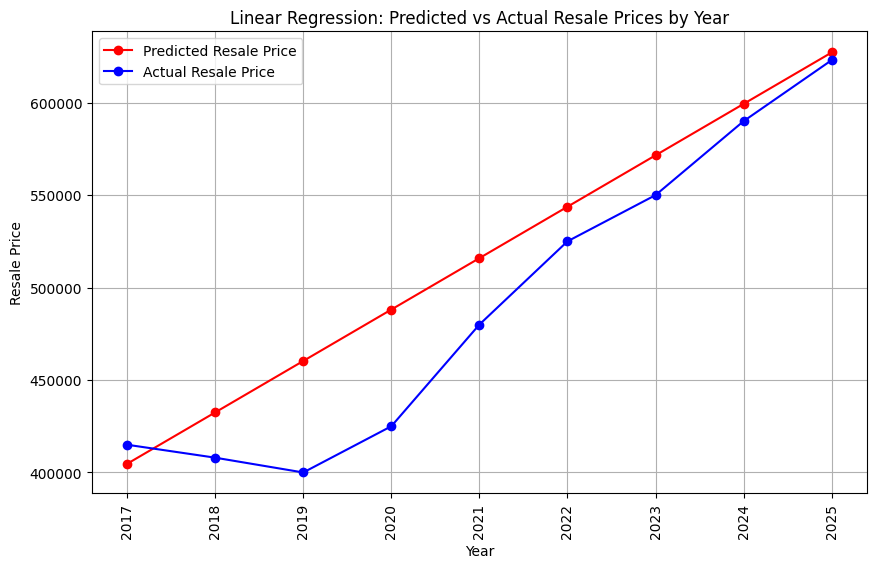

Root Mean Squared Error (RMSE): 168063.18
R-squared (R2): 0.12


In [ ]:
x_year = df_cleaned[['year']].values
y_year = df_cleaned['resale_price']

x_train_year, x_test_year, y_train_year, y_test_year = train_test_split(x_year, y_year, test_size=0.2, random_state=42)

model_year = LinearRegression()
model_year.fit(x_train_year, y_train_year)

intercept_year = model_year.intercept_
coefficients_year = model_year.coef_[0]
print(model_year.coef_)
print(coefficients_year)

equation_year = f"Resale Price = {intercept_year:.2f} + ({coefficients_year:.2f} * Year)"

print("\nLinear Regression Model for Year:")
print(equation_year)

year_predicted_prices = model_year.predict(x_test_year)

df_year_predicted = pd.DataFrame({
    "Year": x_test_year.flatten(),
    "Actual Price": y_test_year.values,
    "Predicted Price": year_predicted_prices
})

df_year_predicted = df_year_predicted.groupby('Year').median().reset_index()

# df_year_predicted = df_year_predicted.sort_values(by='Actual Price', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(df_year_predicted['Year'], df_year_predicted['Predicted Price'], marker='o', linestyle='-', color='red', label="Predicted Resale Price")
plt.plot(df_year_predicted['Year'], df_year_predicted['Actual Price'], marker='o', linestyle='-', color='blue', label="Actual Resale Price")
plt.xlabel("Year")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Predicted vs Actual Resale Prices by Year")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

mse = root_mean_squared_error(y_test_year, year_predicted_prices)
r2 = r2_score(y_test_year, year_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

**Linear Regression: Predicted vs Actual Resale Prices by Town**


Linear Regression Model for Town:
Resale Price = 536896.95 + (-71593.42 * ANG MO KIO) + (-68431.39 * BEDOK) + (156143.01 * BISHAN) + (-50301.14 * BUKIT BATOK) + (85680.62 * BUKIT MERAH) + (-47032.94 * BUKIT PANJANG) + (209332.57 * BUKIT TIMAH) + (135129.53 * CENTRAL AREA) + (-59829.91 * CHOA CHU KANG) + (4108.06 * CLEMENTI) + (-41111.65 * GEYLANG) + (-28737.31 * HOUGANG) + (-71218.77 * JURONG EAST) + (-85695.97 * JURONG WEST) + (39683.21 * KALLANG/WHAMPOA) + (10252.15 * MARINE PARADE) + (33503.65 * PASIR RIS) + (-8059.64 * PUNGGOL) + (87577.27 * QUEENSTOWN) + (-56655.28 * SEMBAWANG) + (-23561.32 * SENGKANG) + (10588.60 * SERANGOON) + (5758.11 * TAMPINES) + (6073.45 * TOA PAYOH) + (-71930.56 * WOODLANDS) + (-99670.93 * YISHUN)


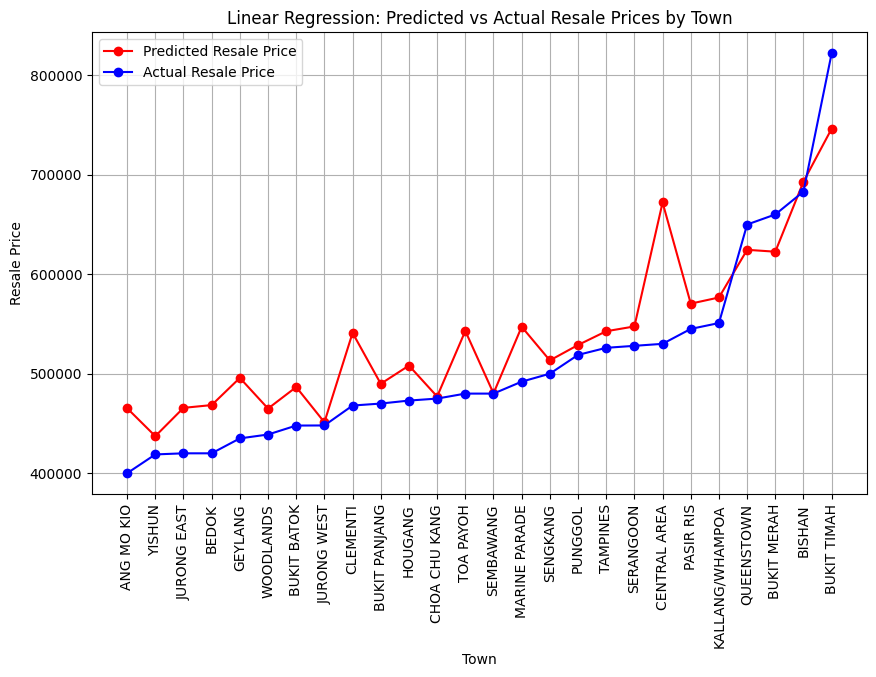

Root Mean Squared Error (RMSE): 169753.64
R-squared (R2): 0.11


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

x_town = pd.get_dummies(df_cleaned['town'])
y_town = df_cleaned['resale_price']

x_train_town, x_test_town, y_train_town, y_test_town = train_test_split(x_town, y_town, test_size=0.2, random_state=42)

model_town = LinearRegression()
model_town.fit(x_train_town, y_train_town)

intercept_town = model_town.intercept_
coefficients_town = model_town.coef_

equation_town = f"Resale Price = {intercept_town:.2f} + " + " + ".join([f"({coef:.2f} * {town})" for coef, town in zip(coefficients_town, x_town)])

print("\nLinear Regression Model for Town:")
print(equation_town)

# Get predicted resale prices for each row in the dataset
town_predicted_prices = model_town.predict(x_test_town)

# Create a DataFrame to map Town to predicted resale prices
df_town_predicted = pd.DataFrame({
    "Town": df_cleaned.iloc[x_test_town.index]['town'],
    "Actual Price": y_test_town.values,
    "Predicted Price": town_predicted_prices
})

# Group by Town and calculate the mean predicted price for each Town
df_town_predicted = df_town_predicted.groupby('Town').median().reset_index()

# Sort the Town based on the predicted price for better visualization
df_town_predicted = df_town_predicted.sort_values(by='Actual Price', ascending=True)

# Create the plot for Towns and Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(df_town_predicted['Town'], df_town_predicted['Predicted Price'], marker='o', linestyle='-', color='red', label="Predicted Resale Price")
plt.plot(df_town_predicted['Town'], df_town_predicted['Actual Price'], marker='o', linestyle='-', color='blue', label="Actual Resale Price")
plt.xlabel("Town")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Predicted vs Actual Resale Prices by Town")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

mse = root_mean_squared_error(y_test_town, town_predicted_prices)
r2 = r2_score(y_test_town, town_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



**Linear Regression: Predicted vs Actual Resale Prices by Flat Type**


Linear Regression Model for Flat Type:
Resale Price = 504424.29 + (-297520.09 * 1 ROOM) + (-216213.83 * 2 ROOM) + (-142827.06 * 3 ROOM) + (9140.22 * 4 ROOM) + (104029.90 * 5 ROOM) + (210354.54 * EXECUTIVE) + (333036.33 * MULTI-GENERATION)


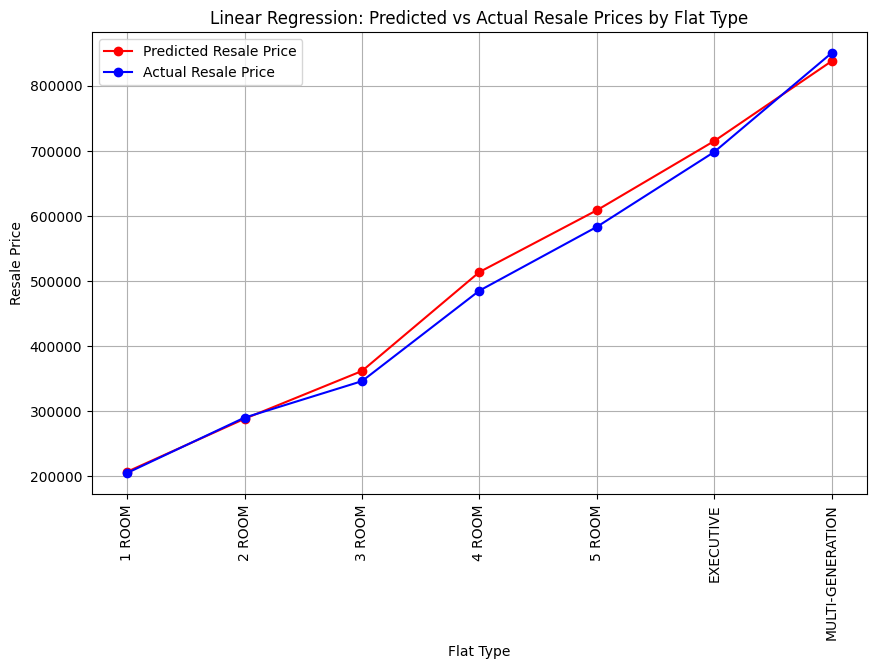

Root Mean Squared Error (RMSE): 143214.66
R-squared (R2): 0.36


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

x_flat_type = pd.get_dummies(df_cleaned['flat_type'])
y_flat_type = df_cleaned['resale_price']

x_train_flat_type, x_test_flat_type, y_train_flat_type, y_test_flat_type = train_test_split(x_flat_type, y_flat_type, test_size=0.2, random_state=42)

model_flat_type = LinearRegression()
model_flat_type.fit(x_train_flat_type, y_train_flat_type)

intercept_flat_type = model_flat_type.intercept_
coefficients_flat_type = model_flat_type.coef_

equation_flat_type = f"Resale Price = {intercept_flat_type:.2f} + " + " + ".join([f"({coef:.2f} * {flat_type})" for coef, flat_type in zip(coefficients_flat_type, x_flat_type)])

print("\nLinear Regression Model for Flat Type:")
print(equation_flat_type)

# Get predicted resale prices for each row in the dataset
flat_type_predicted_prices = model_flat_type.predict(x_test_flat_type)

# Create a DataFrame to map flat type to predicted resale prices
df_flat_type_predicted = pd.DataFrame({
    "Flat Type": df_cleaned.iloc[x_test_flat_type.index]['flat_type'],
    "Actual Price": y_test_flat_type.values,
    "Predicted Price": flat_type_predicted_prices
})

# Group by flat type and calculate the mean predicted price for each flat type
df_flat_type_predicted = df_flat_type_predicted.groupby('Flat Type').median().reset_index()

# Sort the flat type based on the predicted price for better visualization
df_flat_type_predicted = df_flat_type_predicted.sort_values(by='Actual Price', ascending=True)

# Create the plot for Towns and Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(df_flat_type_predicted['Flat Type'], df_flat_type_predicted['Predicted Price'], marker='o', linestyle='-', color='red', label="Predicted Resale Price")
plt.plot(df_flat_type_predicted['Flat Type'], df_flat_type_predicted['Actual Price'], marker='o', linestyle='-', color='blue', label="Actual Resale Price")
plt.xlabel("Flat Type")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Predicted vs Actual Resale Prices by Flat Type")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

mse = root_mean_squared_error(y_test_flat_type, flat_type_predicted_prices)
r2 = r2_score(y_test_flat_type, flat_type_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

**Linear Regression: Predicted vs Actual Resale Prices by Floor Area Sqm**

[4374.63885656]
4374.638856560666

Linear Regression Model for Floor Area Sqm:
Resale Price = 87233.64 + (4374.64 * Floor Area Sqm)


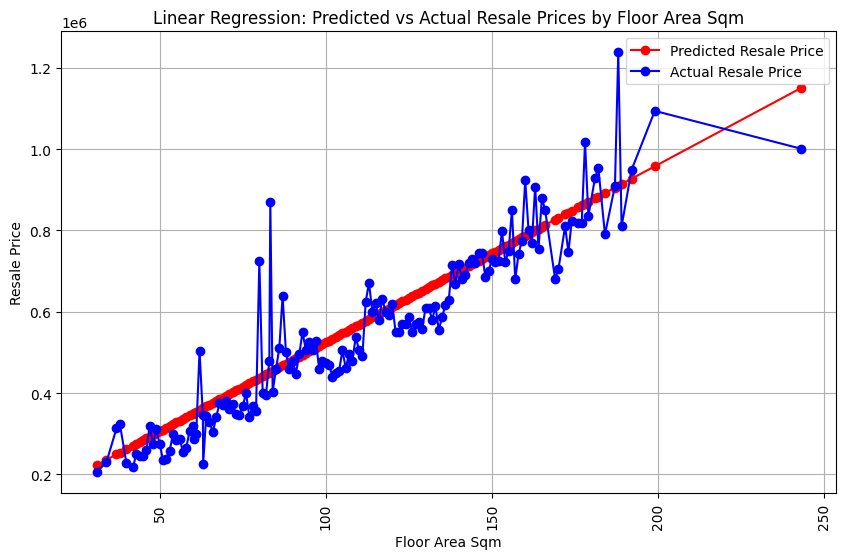

Root Mean Squared Error (RMSE): 145967.46
R-squared (R2): 0.34


In [ ]:
x_floor_area_sqm = df_cleaned[['floor_area_sqm']].values
y_floor_area_sqm = df_cleaned['resale_price']

x_train_floor_area_sqm, x_test_floor_area_sqm, y_train_floor_area_sqm, y_test_floor_area_sqm = train_test_split(x_floor_area_sqm, y_floor_area_sqm, test_size=0.2, random_state=42)

model_floor_area_sqm = LinearRegression()
model_floor_area_sqm.fit(x_train_floor_area_sqm, y_train_floor_area_sqm)

intercept_floor_area_sqm = model_floor_area_sqm.intercept_
coefficients_floor_area_sqm = model_floor_area_sqm.coef_[0]
print(model_floor_area_sqm.coef_)
print(coefficients_floor_area_sqm)

equation_floor_area_sqm = f"Resale Price = {intercept_floor_area_sqm:.2f} + ({coefficients_floor_area_sqm:.2f} * Floor Area Sqm)"

print("\nLinear Regression Model for Floor Area Sqm:")
print(equation_floor_area_sqm)

floor_area_sqm_predicted_prices = model_floor_area_sqm.predict(x_test_floor_area_sqm)

df_floor_area_sqm_predicted = pd.DataFrame({
    "Floor Area Sqm": x_test_floor_area_sqm.flatten(),
    "Actual Price": y_test_floor_area_sqm.values,
    "Predicted Price": floor_area_sqm_predicted_prices
})

df_floor_area_sqm_predicted = df_floor_area_sqm_predicted.groupby('Floor Area Sqm').median().reset_index()

# df_floor_area_sqm_predicted = df_floor_area_sqm_predicted.sort_values(by='Actual Price', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(df_floor_area_sqm_predicted['Floor Area Sqm'], df_floor_area_sqm_predicted['Predicted Price'], marker='o', linestyle='-', color='red', label="Predicted Resale Price")
plt.plot(df_floor_area_sqm_predicted['Floor Area Sqm'], df_floor_area_sqm_predicted['Actual Price'], marker='o', linestyle='-', color='blue', label="Actual Resale Price")
plt.xlabel("Floor Area Sqm")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Predicted vs Actual Resale Prices by Floor Area Sqm")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

mse = root_mean_squared_error(y_test_floor_area_sqm, floor_area_sqm_predicted_prices)
r2 = r2_score(y_test_floor_area_sqm, floor_area_sqm_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



**Linear Regression: Predicted vs Actual Resale Prices by Flat Model**


Linear Regression Model for Flat Model:
Resale Price = 687812.94 + (-342257.43 * 2-room) + (44055.66 * 3Gen) + (57084.55 * Adjoined flat) + (10138.78 * Apartment) + (95445.45 * DBSS) + (-167028.64 * Improved) + (53262.69 * Improved-Maisonette) + (74825.85 * Maisonette) + (-185434.47 * Model A) + (94534.41 * Model A-Maisonette) + (-279046.59 * Model A2) + (149647.67 * Multi Generation) + (-312791.39 * New Generation) + (-136396.27 * Premium Apartment) + (297956.67 * Premium Apartment Loft) + (96887.06 * Premium Maisonette) + (-293091.55 * Simplified) + (-255553.80 * Standard) + (191170.29 * Terrace) + (350920.49 * Type S1) + (455670.58 * Type S2)


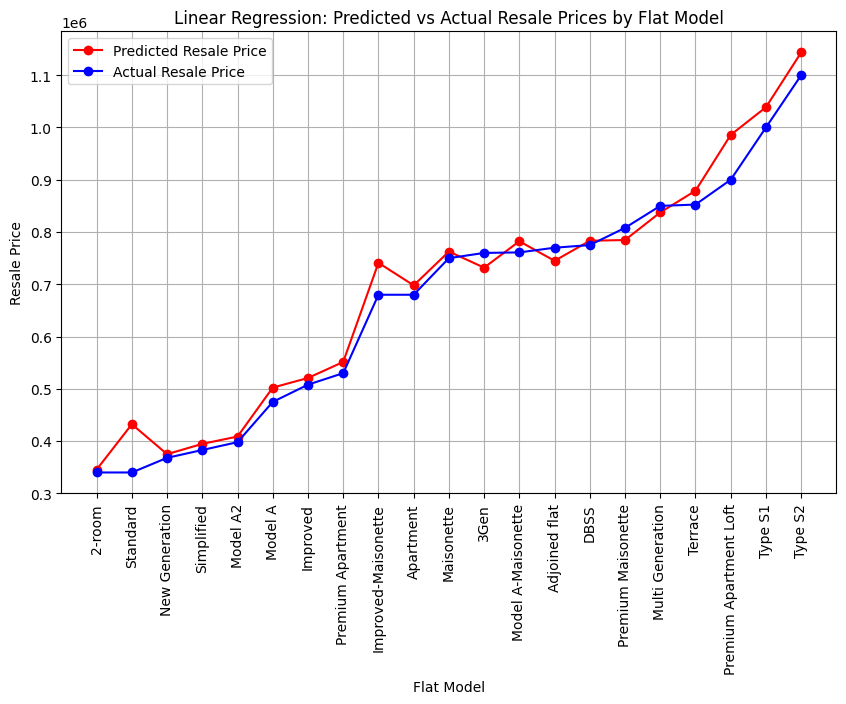

Root Mean Squared Error (RMSE): 152843.61
R-squared (R2): 0.28


In [ ]:
x_flat_model = pd.get_dummies(df_cleaned['flat_model'])
y_flat_model = df_cleaned['resale_price']

x_train_flat_model, x_test_flat_model, y_train_flat_model, y_test_flat_model = train_test_split(x_flat_model, y_flat_model, test_size=0.2, random_state=42)

model_flat_model = LinearRegression()
model_flat_model.fit(x_train_flat_model, y_train_flat_model)

intercept_flat_model = model_flat_model.intercept_
coefficients_flat_model = model_flat_model.coef_

equation_flat_model = f"Resale Price = {intercept_flat_model:.2f} + " + " + ".join([f"({coef:.2f} * {flat_model})" for coef, flat_model in zip(coefficients_flat_model, x_flat_model)])

print("\nLinear Regression Model for Flat Model:")
print(equation_flat_model)

flat_model_predicted_prices = model_flat_model.predict(x_test_flat_model)

df_flat_model_predicted = pd.DataFrame({
    "Flat Model": df_cleaned.iloc[x_test_flat_model.index]['flat_model'],
    "Actual Price": y_test_flat_model.values,
    "Predicted Price": flat_model_predicted_prices
})

df_flat_model_predicted = df_flat_model_predicted.groupby('Flat Model').median().reset_index()

df_flat_model_predicted = df_flat_model_predicted.sort_values(by='Actual Price', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(df_flat_model_predicted['Flat Model'], df_flat_model_predicted['Predicted Price'], marker='o', linestyle='-', color='red', label="Predicted Resale Price")
plt.plot(df_flat_model_predicted['Flat Model'], df_flat_model_predicted['Actual Price'], marker='o', linestyle='-', color='blue', label="Actual Resale Price")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Predicted vs Actual Resale Prices by Flat Model")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

mse = root_mean_squared_error(y_test_flat_model, flat_model_predicted_prices)
r2 = r2_score(y_test_flat_model, flat_model_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

**Linear Regression: Predicted vs Actual Resale Prices by Storey Mid**

[10459.29745315]
10459.297453147308

Linear Regression Model for Storey Mid:
Resale Price = 419797.83 + (10459.30 * Storey Mid)


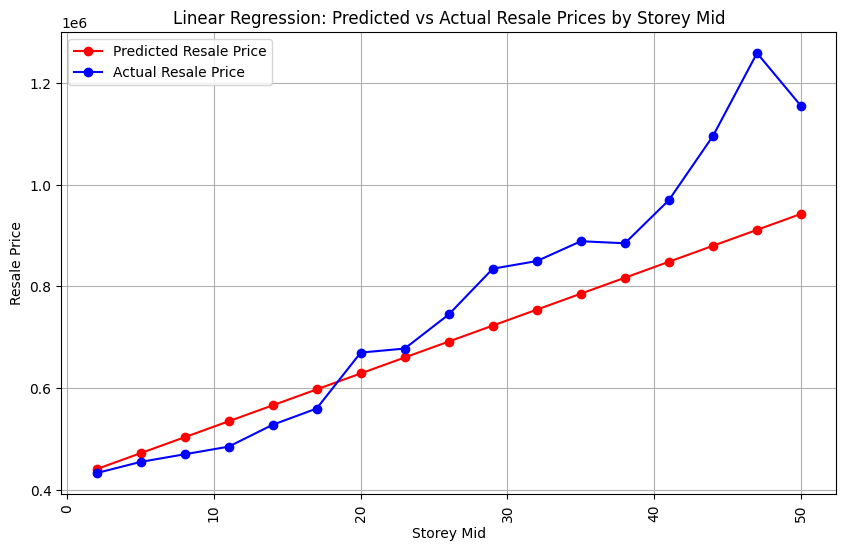

Root Mean Squared Error (RMSE): 168165.71
R-squared (R2): 0.12


In [ ]:
x_storey_mid = df_cleaned[['storey_mid']].values
y_storey_mid = df_cleaned['resale_price']

x_train_storey_mid, x_test_storey_mid, y_train_storey_mid, y_test_storey_mid = train_test_split(x_storey_mid, y_storey_mid, test_size=0.2, random_state=42)

model_storey_mid = LinearRegression()
model_storey_mid.fit(x_train_storey_mid, y_train_storey_mid)

intercept_storey_mid = model_storey_mid.intercept_
coefficients_storey_mid = model_storey_mid.coef_[0]
print(model_storey_mid.coef_)
print(coefficients_storey_mid)

equation_storey_mid = f"Resale Price = {intercept_storey_mid:.2f} + ({coefficients_storey_mid:.2f} * Storey Mid)"

print("\nLinear Regression Model for Storey Mid:")
print(equation_storey_mid)

storey_mid_predicted_prices = model_storey_mid.predict(x_test_storey_mid)

df_storey_mid_predicted = pd.DataFrame({
    "Storey Mid": x_test_storey_mid.flatten(),
    "Actual Price": y_test_storey_mid.values,
    "Predicted Price": storey_mid_predicted_prices
})

df_storey_mid_predicted = df_storey_mid_predicted.groupby('Storey Mid').median().reset_index()

# df_storey_mid_predicted = df_storey_mid_predicted.sort_values(by='Actual Price', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(df_storey_mid_predicted['Storey Mid'], df_storey_mid_predicted['Predicted Price'], marker='o', linestyle='-', color='red', label="Predicted Resale Price")
plt.plot(df_storey_mid_predicted['Storey Mid'], df_storey_mid_predicted['Actual Price'], marker='o', linestyle='-', color='blue', label="Actual Resale Price")
plt.xlabel("Storey Mid")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Predicted vs Actual Resale Prices by Storey Mid")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

mse = root_mean_squared_error(y_test_storey_mid, storey_mid_predicted_prices)
r2 = r2_score(y_test_storey_mid, storey_mid_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

**Linear Regression: Predicted vs Actual Resale Prices by Remaining Lease Years**

[3977.62806404]
3977.6280640372815

Linear Regression Model for Remaining Lease Years:
Resale Price = 215421.21 + (3977.63 * Remaining Lease Years)


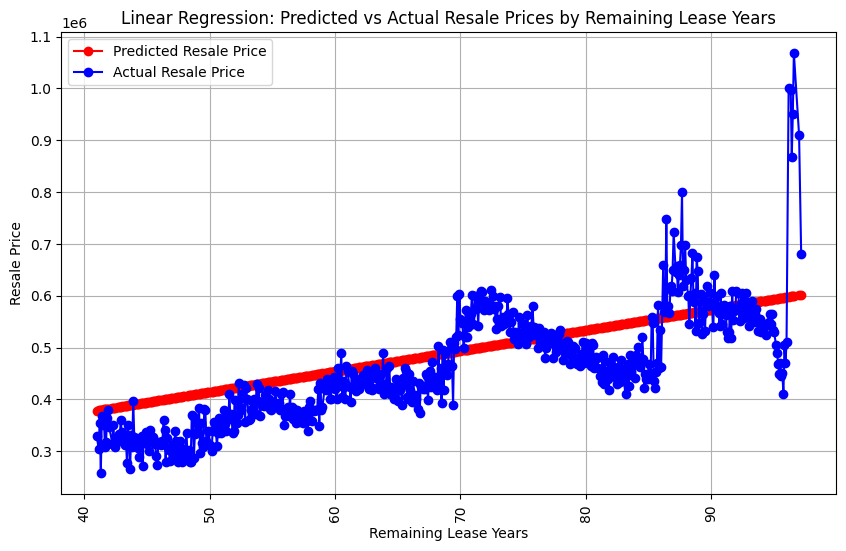

Root Mean Squared Error (RMSE): 170302.82
R-squared (R2): 0.10


In [ ]:
x_remaining_lease_years = df_cleaned[['remaining_lease_years']].values
y_remaining_lease_years = df_cleaned['resale_price']

x_train_remaining_lease_years, x_test_remaining_lease_years, y_train_remaining_lease_years, y_test_remaining_lease_years = train_test_split(x_remaining_lease_years, y_remaining_lease_years, test_size=0.2, random_state=42)

model_remaining_lease_years = LinearRegression()
model_remaining_lease_years.fit(x_train_remaining_lease_years, y_train_remaining_lease_years)

intercept_remaining_lease_years = model_remaining_lease_years.intercept_
coefficients_remaining_lease_years = model_remaining_lease_years.coef_[0]
print(model_remaining_lease_years.coef_)
print(coefficients_remaining_lease_years)

equation_remaining_lease_years = f"Resale Price = {intercept_remaining_lease_years:.2f} + ({coefficients_remaining_lease_years:.2f} * Remaining Lease Years)"

print("\nLinear Regression Model for Remaining Lease Years:")
print(equation_remaining_lease_years)

remaining_lease_years_predicted_prices = model_remaining_lease_years.predict(x_test_remaining_lease_years)

df_remaining_lease_years_predicted = pd.DataFrame({
    "Remaining Lease Years": x_test_remaining_lease_years.flatten(),
    "Actual Price": y_test_remaining_lease_years.values,
    "Predicted Price": remaining_lease_years_predicted_prices
})

df_remaining_lease_years_predicted = df_remaining_lease_years_predicted.groupby('Remaining Lease Years').median().reset_index()

# df_remaining_lease_years_predicted = df_remaining_lease_years_predicted.sort_values(by='Actual Price', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(df_remaining_lease_years_predicted['Remaining Lease Years'], df_remaining_lease_years_predicted['Predicted Price'], marker='o', linestyle='-', color='red', label="Predicted Resale Price")
plt.plot(df_remaining_lease_years_predicted['Remaining Lease Years'], df_remaining_lease_years_predicted['Actual Price'], marker='o', linestyle='-', color='blue', label="Actual Resale Price")
plt.xlabel("Remaining Lease Years")
plt.ylabel("Resale Price")
plt.title("Linear Regression: Predicted vs Actual Resale Prices by Remaining Lease Years")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

mse = root_mean_squared_error(y_test_remaining_lease_years, remaining_lease_years_predicted_prices)
r2 = r2_score(y_test_remaining_lease_years, remaining_lease_years_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



**Multiple Linear Regression: Predicted vs Actual Resale Prices**

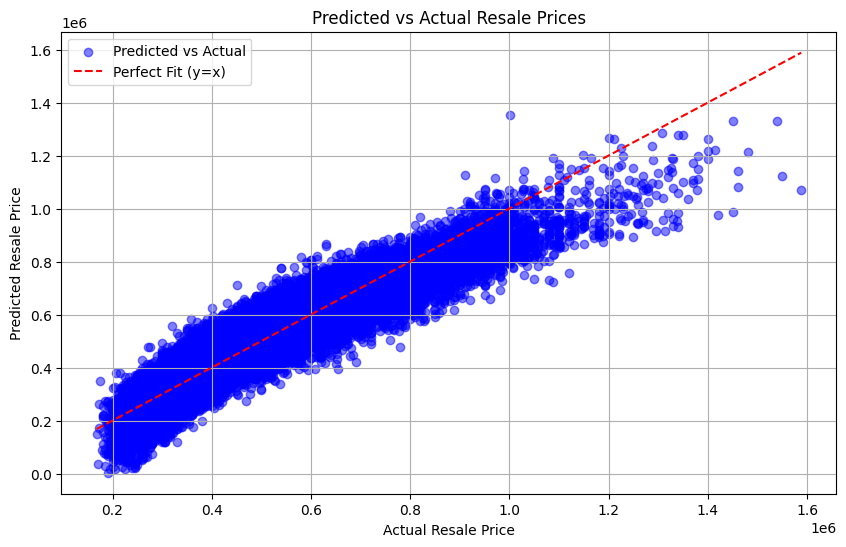

Root Mean Squared Error (RMSE): 65814.45
R-squared (R2): 0.87


In [ ]:
x_multiple_lr = df_cleaned.drop(columns=['resale_price', 'month'])
x_multiple_lr = pd.get_dummies(x_multiple_lr, columns=['town', 'flat_type', 'flat_model'])
y_multiple_lr = df_cleaned['resale_price']

x_train_multiple_lr, x_test_multiple_lr, y_train_multiple_lr, y_test_multiple_lr = train_test_split(x_multiple_lr, y_multiple_lr, test_size=0.2, random_state=42)

model_multiple_lr = LinearRegression()
model_multiple_lr.fit(x_train_multiple_lr, y_train_multiple_lr)

multiple_lr_predicted_prices = model_multiple_lr.predict(x_test_multiple_lr)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_multiple_lr, multiple_lr_predicted_prices, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test_multiple_lr), max(y_test_multiple_lr)], [min(y_test_multiple_lr), max(y_test_multiple_lr)], color='red', linestyle='--', label="Perfect Fit (y=x)")
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Predicted vs Actual Resale Prices")
plt.legend()
plt.grid(True)
plt.show()

mse = root_mean_squared_error(y_test_multiple_lr, multiple_lr_predicted_prices)
r2 = r2_score(y_test_multiple_lr, multiple_lr_predicted_prices)
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Models and Algorithms

1. Support Vector Regression (SVM)

In [ ]:
# Define features and target
features = ['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date',
            'remaining_lease_years', 'storey_mid', 'year']
target = 'resale_price'

X = df_cleaned[features]
y = df_cleaned[target]


In [ ]:
# Sample 5000 rows randomly
df_subset = df_cleaned.sample(n=5000, random_state=42)

X = df_subset[features]
y = df_subset[target]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers
categorical = ['town', 'flat_type', 'flat_model']
numerical = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])


In [ ]:
from sklearn.svm import SVR
from tqdm import tqdm
import time

# Define pipeline with SVR
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf', C=100, epsilon=10000))
])

# Train model with progress bar
with tqdm(total=1, desc="Training SVR Model", bar_format='{l_bar}{bar}| {elapsed} elapsed') as pbar:
    svr_pipeline.fit(X_train, y_train)
    time.sleep(0.1)  # Just to allow progress bar to render smoothly
    pbar.update(1)


Training SVR Model: 100%|██████████| 00:01 elapsed


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = svr_pipeline.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"SVR RMSE: {rmse:.2f}")
print(f"SVR R² Score: {r2:.4f}")


SVR RMSE: 162432.40
SVR R² Score: 0.1037


Model Performance Summary:
- RMSE: 162,432.40
-  On average, your model's predictions are off by around $162,000 from the actual resale price.
-  This is relatively high, considering that most HDB resale prices range between $300k–$600k.


---



- R² Score: 0.1037
- This means the model explains only about 10.4% of the variance in resale prices.
-A low R² suggests that SVR (with current settings) isn't capturing the key patterns well.


---

- Why the Performance is Low:
SVR is sensitive to feature scaling

SVR doesn't perform well on high-dimensional categorical data, especially with one-hot encoding for town, flat_type, etc.

Your epsilon=10000 might be too large, meaning the model is ignoring too much error as acceptable.

Resale prices have complex relationships that tree-based models often capture better than SVR.



2. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np
import time

# ----------- Step 1: Select Features & Target -------------
features = ['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease_years']
target = 'resale_price'

X = df_cleaned[features]
y = df_cleaned[target]

# ----------- Step 2: Split Data -------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- Step 3: Preprocessing Pipeline -------------
categorical = ['town', 'flat_type', 'flat_model']
numerical = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

# ----------- Step 4: Optimized Model Pipeline -------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(
        n_estimators=100,       # Number of trees
        max_depth=20,           # Limits tree depth to reduce complexity
        n_jobs=-1,              # Uses all CPU cores
        random_state=42         # Ensures reproducibility
    ))
])

# ----------- Step 5: Training with Progress Bar -------------
with tqdm(total=1, desc="Training Random Forest", bar_format='{l_bar}{bar}| {elapsed} elapsed') as pbar:
    rf_pipeline.fit(X_train, y_train)
    time.sleep(0.1)  # Just to make the progress bar visible
    pbar.update(1)

# ----------- Step 6: Evaluation -------------
y_pred = rf_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Random Forest RMSE: {rmse:.2f}")
print(f"✅ Random Forest R² Score: {r2:.4f}")


Training Random Forest:   0%|          | 00:00 elapsed

3. XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

features = ['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease_years']
target = 'resale_price'

X = df_cleaned[features]
y = df_cleaned[target]

# --- One-Hot Encoding for Categorical Features ---
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
encoded_features = encoder.fit_transform(X[['town', 'flat_type', 'flat_model']]) # Fit and transform categorical features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['town', 'flat_type', 'flat_model'])) # Create DataFrame from encoded features
X = X.drop(['town', 'flat_type', 'flat_model'], axis=1) # Drop original categorical columns
X = pd.concat([X, encoded_df], axis=1) # Concatenate encoded features with numerical features

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- XGBoost Model ---
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, enable_categorical=True) # enable_categorical is not required for the updated xgboost


xgbr.fit(X_train, y_train) # Fit the model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=True,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
prediction_xgbr=xgbr.predict(X_test)

In [ ]:
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,prediction_xgbr))

RMSE_XGBoost Regression= 53348.58141956742
R2 Score_XGBoost Regression= 0.911746885818734


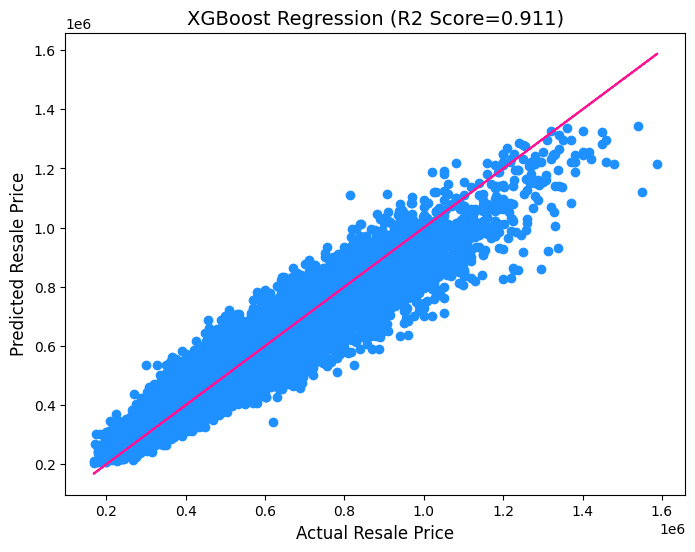

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Resale Price',fontsize=12)
plt.ylabel('Predicted Resale Price',fontsize=12)
plt.title('XGBoost Regression (R2 Score=0.911)',fontsize=14)
plt.show()

4. K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

features = ['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease_years']
target = 'resale_price'

X = df_cleaned[features]
y = df_cleaned[target]

# --- One-Hot Encoding for Categorical Features ---
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
encoded_features = encoder.fit_transform(X[['town', 'flat_type', 'flat_model']]) # Fit and transform categorical features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['town', 'flat_type', 'flat_model'])) # Create DataFrame from encoded features
X = X.drop(['town', 'flat_type', 'flat_model'], axis=1) # Drop original categorical columns
X = pd.concat([X, encoded_df], axis=1) # Concatenate encoded features with numerical features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)

# Train model
knn.fit(X_train, y_train)

# Predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate root mean squared error
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 2042045840.2091427
Mean Absolute Error: 30870.353037801196
Root Mean Squared Error: 45189.00131900619
R-squared: 0.9366787069376381


Classification into bins

5. Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [ ]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_multiple_lr)
x_test_scaled = scaler.transform(x_test_multiple_lr)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_multiple_lr.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_multiple_lr.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
generator = torch.Generator(device=device).manual_seed(42)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, generator=generator)

In [ ]:
# Define the neural network model
class ResalePriceNN(nn.Module):
    def __init__(self, input_dim):
        super(ResalePriceNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
# Initialize model, loss, and optimizer
model = ResalePriceNN(input_dim=X_train_tensor.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.2f}")

Epoch 10/100 - Loss: 2671205376.00
Epoch 20/100 - Loss: 2734594048.00
Epoch 30/100 - Loss: 2292637952.00
Epoch 40/100 - Loss: 2414304256.00
Epoch 50/100 - Loss: 1774245120.00
Epoch 60/100 - Loss: 1831866240.00
Epoch 70/100 - Loss: 1916068096.00
Epoch 80/100 - Loss: 1675407360.00
Epoch 90/100 - Loss: 2103113856.00
Epoch 100/100 - Loss: 1725883008.00


In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy().flatten()

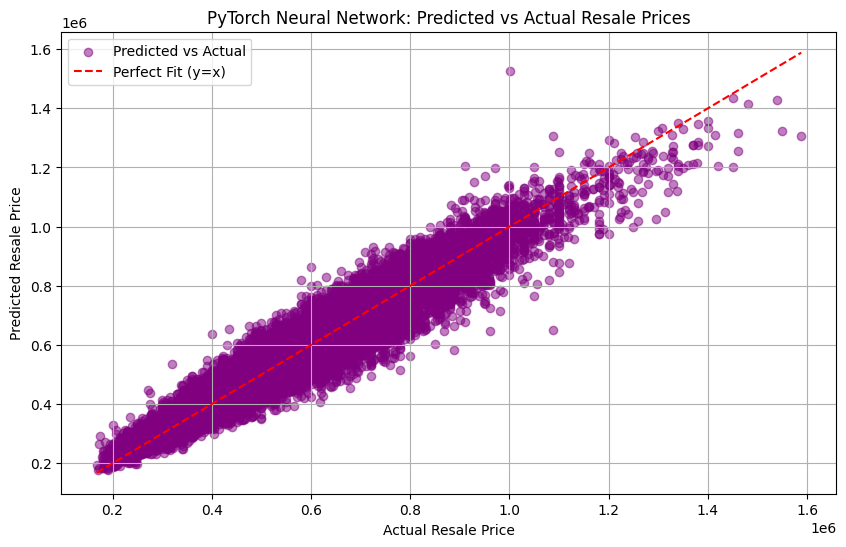

Root Mean Squared Error (RMSE): 43582.96
R-squared (R2): 0.94


In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multiple_lr, predictions, alpha=0.5, color='purple', label="Predicted vs Actual")
plt.plot([min(y_test_multiple_lr), max(y_test_multiple_lr)], [min(y_test_multiple_lr), max(y_test_multiple_lr)], color='red', linestyle='--', label="Perfect Fit (y=x)")
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("PyTorch Neural Network: Predicted vs Actual Resale Prices")
plt.legend()
plt.grid(True)
plt.show()

rmse = root_mean_squared_error(y_test_multiple_lr, predictions)
r2 = r2_score(y_test_multiple_lr, predictions)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Retrive list of amenities

In [ ]:
list_of_mrt = [
    'DHOBY GHAUT (CC1)',
    'BRAS BASAH (CC2)',
    'ESPLANADE (CC3)',
    'PROMENADE (CC4)',
    'NICOLL HIGHWAY (CC5)',
    'STADIUM (CC6)',
    'MOUNTBATTEN (CC7)',
    'DAKOTA (CC8)',
    'PAYA LEBAR (CC9)',
    'MACPHERSON (CC10)',
    'TAI SENG (CC11)',
    'BARTLEY (CC12)',
    'SERANGOON (CC13)',
    'LORONG CHUAN (CC14)',
    'BISHAN (CC15)',
    'MARYMOUNT (CC16)',
    'CALDECOTT (CC17)',
    'BOTANIC GARDENS (CC19)',
    'FARRER ROAD (CC20)',
    'HOLLAND VILLAGE (CC21)',
    'BUONA VISTA (CC22)',
    'ONE-NORTH (CC23)',
    'KENT RIDGE (CC24)',
    'HAW PAR VILLA (CC25)',
    'PASIR PANJANG (CC26)',
    'LABRADOR PARK (CC27)',
    'TELOK BLANGAH (CC28)',
    'HARBOURFRONT (CC29)',
    'PASIR RIS (EW1)',
    'TAMPINES (EW2)',
    'SIMEI (EW3)',
    'TANAH MERAH (EW4)',
    'BEDOK (EW5)',
    'KEMBANGAN (EW6)',
    'EUNOS (EW7)',
    'PAYA LEBAR (EW8)',
    'ALJUNIED (EW9)',
    'KALLANG (EW10)',
    'LAVENDER (EW11)',
    'BUGIS (EW12)',
    'CITY HALL (EW13)',
    'RAFFLES PLACE (EW14)',
    'TANJONG PAGAR (EW15)',
    'OUTRAM PARK (EW16)',
    'TIONG BAHRU (EW17)',
    'REDHILL (EW18)',
    'QUEENSTOWN (EW19)',
    'COMMONWEALTH (EW20)',
    'BUONA VISTA (EW21)',
    'DOVER (EW22)',
    'CLEMENTI (EW23)',
    'JURONG EAST (EW24)',
    'CHINESE GARDEN (EW25)',
    'LAKESIDE (EW26)',
    'BOON LAY (EW27)',
    'PIONEER (EW28)',
    'JOO KOON (EW29)',
    'GUL CIRCLE (EW30)',
    'TUAS CRESCENT (EW31)',
    'TUAS WEST ROAD (EW32)',
    'TUAS LINK (EW33)',
    'JURONG EAST (NS1)',
    'BUKIT BATOK (NS2)',
    'BUKIT GOMBAK (NS3)',
    'CHOA CHU KANG (NS4)',
    'YEW TEE (NS5)',
    'KRANJI (NS7)',
    'MARSILING (NS8)',
    'WOODLANDS (NS9)',
    'ADMIRALTY (NS10)',
    'SEMBAWANG (NS11)',
    'CANBERRA (NS12)',
    'YISHUN (NS13)',
    'KHATIB (NS14)',
    'YIO CHU KANG (NS15)',
    'ANG MO KIO (NS16)',
    'BISHAN (NS17)',
    'BRADDELL (NS18)',
    'TOA PAYOH (NS19)',
    'NOVENA (NS20)',
    'NEWTON (NS21)',
    'ORCHARD (NS22)',
    'SOMERSET (NS23)',
    'DHOBY GHAUT (NS24)',
    'CITY HALL (NS25)',
    'RAFFLES PLACE (NS26)',
    'MARINA BAY (NS27)',
    'MARINA SOUTH PIER (NS28)',
    'BUKIT PANJANG (DT1)',
    'CASHEW (DT2)',
    'HILLVIEW (DT3)',
    'BEAUTY WORLD (DT5)',
    'KING ALBERT PARK (DT6)',
    'SIXTH AVENUE (DT7)',
    'TAN KAH KEE (DT8)',
    'BOTANIC GARDENS (DT9)',
    'STEVENS (DT10)',
    'NEWTON (DT11)',
    'LITTLE INDIA (DT12)',
    'ROCHOR (DT13)',
    'BUGIS (DT14)',
    'PROMENADE (DT15)',
    'BAYFRONT (DT16)',
    'DOWNTOWN (DT17)',
    'TELOK AYER (DT18)',
    'CHINATOWN (DT19)',
    'FORT CANNING (DT20)',
    'BENCOOLEN (DT21)',
    'JALAN BESAR (DT22)',
    'BENDEMEER (DT23)',
    'GEYLANG BAHRU (DT24)',
    'MATTAR (DT25)',
    'MACPHERSON (DT26)',
    'UBI (DT27)',
    'KAKI BUKIT (DT28)',
    'BEDOK NORTH (DT29)',
    'BEDOK RESERVOIR (DT30)',
    'TAMPINES WEST (DT31)',
    'TAMPINES (DT32)',
    'TAMPINES EAST (DT33)',
    'UPPER CHANGI (DT34)',
    'EXPO (DT35)',
    'HARBOURFRONT (NE1)',
    'OUTRAM PARK (NE3)',
    'CHINATOWN (NE4)',
    'CLARKE QUAY (NE5)',
    'DHOBY GHAUT (NE6)',
    'LITTLE INDIA (NE7)',
    'FARRER PARK (NE8)',
    'BOON KENG (NE9)',
    'POTONG PASIR (NE10)',
    'WOODLEIGH (NE11)',
    'SERANGOON (NE12)',
    'KOVAN (NE13)',
    'HOUGANG (NE14)',
    'BUANGKOK (NE15)',
    'SENGKANG (NE16)',
    'PUNGGOL (NE17)',
    'WOODLANDS NORTH (TE1)',
    'WOODLANDS (TE2)',
    'WOODLANDS SOUTH (TE3)',
    'SPRINGLEAF (TE4)',
    'LENTOR (TE5)',
    'MAYFLOWER (TE6)',
    'BRIGHT HILL (TE7)',
    'UPPER THOMSON (TE8)',
    'CALDECOTT (TE9)',
    'STEVENS (TE11)',
    'NAPIER (TE12)',
    'ORCHARD BOULEVARD (TE13)',
    'ORCHARD (TE14)',
    'GREAT WORLD (TE15)',
    'HAVELOCK (TE16)',
    'OUTRAM PARK (TE17)',
    'MAXWELL (TE18)',
    'SHENTON WAY (TE19)',
    'MARINA BAY (TE20)',
    'GARDENS BY THE BAY (TE22)',
    'CHOA CHU KANG (BP1)',
    'SOUTH VIEW (BP2)',
    'KEAT HONG (BP3)',
    'TECK WHYE (BP4)',
    'PHOENIX (BP5)',
    'BUKIT PANJANG (BP6)',
    'PETIR (BP7)',
    'PENDING (BP8)',
    'BANGKIT (BP9)',
    'FAJAR (BP10)',
    'SEGAR (BP11)',
    'JELAPANG (BP12)',
    'SENJA (BP13)',
    'SENGKANG (STC)',
    'CHENG LIM (SW1)',
    'FARMWAY (SW2)',
    'KUPANG (SW3)',
    'THANGGAM (SW4)',
    'FERNVALE (SW5)',
    'LAYAR (SW6)',
    'TONGKANG (SW7)',
    'RENJONG (SW8)',
    'COMPASSVALE (SE1)',
    'RUMBIA (SE2)',
    'BAKAU (SE3)',
    'KANGKAR (SE4)',
    'RANGGUNG (SE5)',
    'PUNGGOL (PTC)',
    'SAM KEE (PW1)',
    'PUNGGOL POINT (PW3)',
    'SAMUDERA (PW4)',
    'NIBONG (PW5)',
    'SUMANG (PW6)',
    'SOO TECK (PW7)',
    'COVE (PE1)',
    'MERIDIAN (PE2)',
    'CORAL EDGE (PE3)',
    'RIVIERA (PE4)',
    'KADALOOR (PE5)',
    'OASIS (PE6)',
    'DAMAI (PE7)'
]

list_of_malls = [
    '100 AM',
    '600 @ Toa Payoh',
    'Anchorpoint',
    'Beauty World Centre',
    'Beauty World Plaza',
    'Causeway Point',
    'Century Square',
    'CIMB Plaza',
    'City Square Mall',
    'City Vibe',
    'CityLink Mall',
    'Eastpoint Mall',
    'ERA APAC Centre',
    'FairPrice Hub',
    'Forum The Shopping Mall',
    'Fu Lu Shou Complex',
    'Holland Road Shopping Centre',
    'Holland Piazza',
    'Hougang 1',
    'Hougang Mall',
    'IMM',
    'Jem',
    'KINEX',
    'Leisure Park Kallang',
    'Lot One',
    'Marina Bay Link Mall',
    'Mustafa Centre',
    'myVillage @ Serangoon',
    'Nex',
    'Orchard Central',
    'Plaza Singapura',
    'Queensway Shopping Centre',
    'The Rail Mall',
    'Rivervale Mall',
    'Rochester Mall',
    'Seletar Mall',
    'Sembawang Shopping Centre',
    'Sim Lim Square',
    'Sim Lim Tower',
    'The Centrepoint',
    'The Majestic',
    'The Star Vista',
    'Tampines 1',
    'Tampines Mall',
    'Tekka Centre',
    'Thomson Plaza',
    'Upper Serangoon Shopping Centre',
    'VivoCity',
    'West Mall',
    'White Sands',
    'Wisma Geylang Serai',
    'Yew Tee Point',
    '313@Somerset',
    'AMK Hub',
    'Alexandra Retail Centre',
    'Bedok Mall',
    'Bugis Junction',
    'Bugis+',
    'Bukit Panjang Plaza',
    'Capitol Singapore',
    'Changi City Point',
    'Chinatown Point',
    'Clarke Quay Central',
    'Claymore Connect',
    'Clementi Mall',
    'Compass One',
    'Djitsun Mall',
    'Esplanade Mall',
    'Far East Plaza',
    'Funan',
    'Golden Mile Complex',
    'Great World',
    'HarbourFront Centre',
    'Hillion Mall',
    'i12 Katong',
    'ION Orchard',
    'International Plaza',
    'Jewel Changi Airport',
    'Junction 8',
    'Junction 10',
    'Junction Nine',
    'Jurong Point',
    'Kallang Wave Mall',
    'Katong Shopping Centre',
    'Lucky Plaza',
    'Mandarin Gallery',
    'The Shoppes at Marina Bay Sands',
    'Marina Square',
    'Millenia Walk',
    'Ngee Ann City',
    'Northpoint City',
    'Novena Square',
    'One Raffles Place',
    'Orchard Gateway',
    'Orchard Towers',
    'PLQ Mall',
    'Palais Renaissance',
    'Parkway Parade',
    'Paya Lebar Square',
    'Peninsula Plaza',
    "People's Park Centre",
    "People's Park Complex",
    'Raffles City',
    'Sengkang Grand Mall',
    'Shaw House and Centre',
    'SingPost Centre',
    'South Beach Square 2',
    'Sun Plaza',
    'Suntec City Mall',
    'Tang Plaza',
    'Tekka Place',
    'The Paragon',
    'The Woodleigh Mall',
    'Tiong Bahru Plaza',
    'United Square',
    'Valley Point',
    'Waterway Point',
    'West Coast Plaza',
    'Westgate',
    'Wheelock Place',
    'Wisma Atria',
    'Wisteria Mall',
    '888 Plaza',
    'Admiralty Place',
    'Buangkok Square',
    'Canberra Plaza',
    'Dawson Place',
    'Depot Heights Shopping Centre',
    'Elias Mall',
    'Fajar Shopping Centre',
    'Gek Poh Shopping Centre',
    'Greenridge Shopping Centre',
    'Heartland Mall',
    'HDB Hub',
    'Hougang Rivercourt',
    'Limbang Shopping Centre',
    'Loyang Point',
    'Northshore Plaza',
    'Oasis Terraces',
    'Our Tampines Hub',
    'Pasir Ris West Plaza',
    'Pioneer Mall',
    'Punggol Plaza',
    'Rivervale Plaza',
    'Sunshine Place',
    'Taman Jurong Shopping Centre',
    'Vista Point',
    'Woodlands North Plaza',
    'Yew Tee Square',
    '321 Clementi',
    'Cathay Cineleisure Orchard',
    'GV Yishun',
    'The Cathay'
]

list_of_npc = [
    'Bukit Merah East Neighbourhood Police Centre',
    'Marina Bay Neighbourhood Police Centre',
    'Rochor Neighbourhood Police Centre',
    'Bukit Merah West Neighbourhood Police Centre',
    'Clementi Neighbourhood Police Centre',
    'Jurong East Neighbourhood Police Centre',
    'Queenstown Neighbourhood Police Centre',
    'Bishan Neighbourhood Police Centre',
    'Bukit Timah Neighbourhood Police Centre',
    'Kampong Java Neighbourhood Police Centre',
    'Orchard Neighbourhood Police Centre',
    'Toa Payoh Neighbourhood Police Centre',
    'Ang Mo Kio North Neighbourhood Police Centre',
    'Ang Mo Kio South Neighbourhood Police Centre',
    'Hougang Neighbourhood Police Centre',
    'Punggol Neighbourhood Police Centre',
    'Sembawang Neighbourhood Police Centre',
    'Sengkang Neighbourhood Police Centre',
    'Serangoon Neighbourhood Police Centre',
    'Yishun North Neighbourhood Police Centre',
    'Yishun South Neighbourhood Police Centre',
    'Bedok Neighbourhood Police Centre',
    'Changi Neighbourhood Police Centre',
    'Geylang Neighbourhood Police Centre',
    'Marine Parade Neighbourhood Police Centre',
    'Pasir Ris Neighbourhood Police Centre',
    'Tampines Neighbourhood Police Centre',
    'Bukit Batok Neighbourhood Police Centre',
    'Bukit Panjang Neighbourhood Police Centre',
    'Choa Chu Kang Neighbourhood Police Centre',
    'Jurong West Neighbourhood Police Centre',
    'Nanyang Neighbourhood Police Centre',
    'Woodlands Neighbourhood Police Centre',
    'Woodlands East Neighbourhood Police Centre',
    'Woodlands West Neighbourhood Police Centre'
]

singapore_primary_schools = [
    "Admiralty Primary School",
    "Ahmad Ibrahim Primary School",
    "Ai Tong School",
    "Alexandra Primary School",
    "Anchor Green Primary School",
    "Anderson Primary School",
    "Ang Mo Kio Primary School",
    "Anglo-Chinese School (Junior)",
    "Anglo-Chinese School (Primary)",
    "Angsana Primary School",
    "Beacon Primary School",
    "Bedok Green Primary School",
    "Bendemeer Primary School",
    "Blangah Rise Primary School",
    "Boon Lay Garden Primary School",
    "Bukit Panjang Primary School",
    "Bukit Timah Primary School",
    "Bukit View Primary School",
    "Canberra Primary School",
    "Canossa Catholic Primary School",
    "Cantonment Primary School",
    "Casuarina Primary School",
    "Catholic High School",
    "Cedar Primary School",
    "Changkat Primary School",
    "CHIJ (Katong) Primary",
    "CHIJ (Kellock)",
    "CHIJ Our Lady of Good Counsel",
    "CHIJ Our Lady of the Nativity",
    "CHIJ Our Lady Queen of Peace",
    "CHIJ Primary (Toa Payoh)",
    "CHIJ St. Nicholas Girls’ School",
    "Chongfu School",
    "Chongzheng Primary School",
    "Chua Chu Kang Primary School",
    "Clementi Primary School",
    "Compassvale Primary School",
    "Concord Primary School",
    "Corporation Primary School",
    "Damai Primary School",
    "Dazhong Primary School",
    "De La Salle School",
    "East Spring Primary School",
    "Edgefield Primary School",
    "Elias Park Primary School",
    "Endeavour Primary School",
    "Eunos Primary School",
    "Evergreen Primary School",
    "Fairfield Methodist School (Primary)",
    "Farrer Park Primary School",
    "Fengshan Primary School",
    "Fern Green Primary School",
    "Fernvale Primary School",
    "First Toa Payoh Primary School",
    "Frontier Primary School",
    "Fuchun Primary School",
    "Fuhua Primary School",
    "Gan Eng Seng Primary School",
    "Geylang Methodist School (Primary)",
    "Gongshang Primary School",
    "Greendale Primary School",
    "Greenridge Primary School",
    "Greenwood Primary School",
    "Guangyang Primary School",
    "Haig Girls’ School",
    "Henry Park Primary School",
    "Holy Innocents’ Primary School",
    "Hong Wen School",
    "Horizon Primary School",
    "Hougang Primary School",
    "Huamin Primary School",
    "Innova Primary School",
    "Jiemin Primary School",
    "Jing Shan Primary School",
    "Junyuan Primary School",
    "Jurong Primary School",
    "Jurong West Primary School",
    "Juying Primary School",
    "Keming Primary School",
    "Kheng Cheng School",
    "Kong Hwa School",
    "Kranji Primary School",
    "Kuo Chuan Presbyterian Primary School",
    "Lakeside Primary School",
    "Lianhua Primary School",
    "Maha Bodhi School",
    "Maris Stella High School",
    "Marsiling Primary School",
    "Marymount Convent School",
    "Mayflower Primary School",
    "Mee Toh School",
    "Meridian Primary School",
    "Methodist Girls’ School (Primary)",
    "Montfort Junior School",
    "Nan Chiau Primary School",
    "Nan Hua Primary School",
    "Nanyang Primary School",
    "Naval Base Primary School",
    "New Town Primary School",
    "Ngee Ann Primary School",
    "North Spring Primary School",
    "North View Primary School",
    "North Vista Primary School",
    "Northland Primary School",
    "Northoaks Primary School",
    "Oasis Primary School",
    "Palm View Primary School",
    "Park View Primary School",
    "Pasir Ris Primary School",
    "Paya Lebar Methodist Girls' School (Primary)",
    "Pei Chun Public School",
    "Pei Hwa Presbyterian Primary School",
    "Pei Tong Primary School",
    "Peiying Primary School",
    "Pioneer Primary School",
    "Poi Ching School",
    "Princess Elizabeth Primary School",
    "Punggol Cove Primary School",
    "Punggol Green Primary School",
    "Punggol Primary School",
    "Punggol View Primary School",
    "Qihua Primary School",
    "Queenstown Primary School",
    "Radin Mas Primary School",
    "Raffles Girls' Primary School",
    "Red Swastika School",
    "River Valley Primary School",
    "Riverside Primary School",
    "Rivervale Primary School",
    "Rosyth School",
    "Rulang Primary School",
    "Sembawang Primary School",
    "Seng Kang Primary School",
    "Shuqun Primary School",
    "Si Ling Primary School",
    "Singapore Chinese Girls' Primary School",
    "South View Primary School",
    "Springdale Primary School",
    "St. Andrew's Junior School",
    "St. Anthony's Canossian Primary School",
    "St. Anthony's Primary School",
    "St. Gabriel's Primary School",
    "St. Hilda's Primary School",
    "St. Joseph's Institution Junior",
    "St. Margaret's Primary School",
    "St. Stephen's School",
    "Stamford Primary School",
    "Tampines North Primary School",
    "Tampines Primary School",
    "Tanjong Katong Primary School",
    "Tao Nan School",
    "Teck Ghee Primary School",
    "Teck Whye Primary School",
    "Telok Kurau Primary School",
    "Temasek Primary School",
    "Townsville Primary School",
    "Unity Primary School",
    "Valour Primary School",
    "Waterway Primary School",
    "Wellington Primary School",
    "West Grove Primary School",
    "West Spring Primary School",
    "West View Primary School",
    "Westwood Primary School",
    "White Sands Primary School",
    "Woodgrove Primary School",
    "Woodlands Primary School",
    "Woodlands Ring Primary School",
    "Xinghua Primary School",
    "Xingnan Primary School",
    "Xinmin Primary School",
    "Xishan Primary School",
    "Yangzheng Primary School",
    "Yew Tee Primary School",
    "Yio Chu Kang Primary School",
    "Yishun Primary School",
    "Yu Neng Primary School",
    "Yuhua Primary School",
    "Yumin Primary School",
    "Zhangde Primary School",
    "Zhenghua Primary School",
    "Zhonghua Primary School"
]

singapore_secondary_schools = [
    "Ahmad Ibrahim Secondary School",
    "Anderson Secondary School",
    "Ang Mo Kio Secondary School",
    "Anglican High School, Singapore",
    "Anglo-Chinese School (Barker Road)",
    "Anglo-Chinese School (Independent)",
    "Bartley Secondary School",
    "Beatty Secondary School",
    "Bedok Green Secondary School",
    "Bedok South Secondary School",
    "Bedok View Secondary School",
    "Boon Lay Secondary School",
    "Bowen Secondary School",
    "Braddell Secondary School",
    "Broadrick Secondary School",
    "Bukit Batok Secondary School",
    "Bukit Merah Secondary School",
    "Bukit Panjang Government High School",
    "Bukit View Secondary School",
    "Canberra Secondary School",
    "Catholic High School",
    "Cedar Girls' Secondary School",
    "CHIJ Katong Convent",
    "CHIJ Saint Joseph's Convent",
    "CHIJ Saint Nicholas Girls' School",
    "CHIJ Saint Theresa's Convent",
    "CHIJ Secondary (Toa Payoh)",
    "The Chinese High School",
    "Christ Church Secondary School",
    "Chua Chu Kang Secondary School",
    "Chung Cheng High School (Main)",
    "Chung Cheng High School (Yishun)",
    "Clementi Town Secondary School",
    "Commonwealth Secondary School",
    "Compassvale Secondary School",
    "Crescent Girls' School",
    "Crest Secondary School",
    "Damai Secondary School",
    "Deyi Secondary School",
    "Dunman High School",
    "Dunman Secondary School",
    "East Spring Secondary School",
    "Edgefield Secondary School",
    "Evergreen Secondary School",
    "Fairfield Methodist School (Secondary)",
    "Fajar Secondary School",
    "Fuchun Secondary School",
    "Fuhua Secondary School",
    "Gan Eng Seng School",
    "Geylang Methodist School (Secondary)",
    "Greendale Secondary School",
    "Greenridge Secondary School",
    "Guangyang Secondary School",
    "Hai Sing Catholic School",
    "Hillgrove Secondary School",
    "Holy Innocents' High School",
    "Hougang Secondary School",
    "Hua Yi Secondary School",
    "Hwa Chong Institution",
    "Junyuan Secondary School",
    "Jurong Secondary School",
    "Jurongville Secondary School",
    "Kranji Secondary School",
    "Kuo Chuan Presbyterian Secondary School",
    "Loyang View Secondary School",
    "Madrasah Al-Arabiah Al-Islamiah",
    "Madrasah Al-Maarif Al-Islamiah",
    "Madrasah Aljunied Al-Islamiah",
    "Manjusri Secondary School",
    "Maris Stella High School",
    "Marsiling Secondary School",
    "Mayflower Secondary School",
    "Meridian Secondary School",
    "Methodist Girls' School",
    "Montfort Secondary School",
    "Nan Chiau High School",
    "Nan Hua High School",
    "Nanyang Girls' High School",
    "Naval Base Secondary School",
    "New Town Secondary School",
    "Ngee Ann Secondary School",
    "North View Secondary School",
    "Northbrooks Secondary School",
    "NUS High School of Math and Science",
    "Orchid Park Secondary School",
    "Outram Secondary School",
    "Pasir Ris Secondary School",
    "Paya Lebar Methodist Girls' School (Secondary)",
    "Pei Hwa Secondary School",
    "Peirce Secondary School",
    "Pioneer Secondary School",
    "Presbyterian High School",
    "Queenstown Secondary School",
    "Queensway Secondary School",
    "Raffles Girls' School (Secondary)",
    "Raffles Institution",
    "River Valley High School",
    "Riverside Secondary School",
    "Saint Andrew's Secondary School",
    "Saint Anthony's Canossian Secondary School",
    "St. Gabriel's Secondary School",
    "St. Hilda's Secondary School",
    "Saint Joseph's Institution",
    "Saint Margaret's Secondary School",
    "Saint Patrick's School",
    "San Yu Adventist School",
    "School of Science and Technology",
    "Sembawang Secondary School",
    "Sengkang Secondary School",
    "Serangoon Garden Secondary School",
    "Serangoon Secondary School",
    "Singapore Chinese Girls' School",
    "Singapore Sports School",
    "SJI International School",
    "Springfield Secondary School",
    "Swiss Cottage Secondary School",
    "Tampines Secondary School",
    "Tanglin Secondary School",
    "Tanjong Katong Girls' School",
    "Tanjong Katong Secondary School",
    "Teck Whye Secondary School",
    "Temasek Secondary School",
    "Tiong Bahru Secondary School",
    "Victoria School",
    "West Spring Secondary School",
    "Westwood Secondary School",
    "Whampoa Secondary School",
    "Whitley Secondary School",
    "Xinmin Secondary School",
    "Yio Chu Kang Secondary School",
    "Yishun Secondary School",
    "Yishun Town Secondary School",
    "Yuan Ching Secondary School",
    "Yuhua Secondary School",
    "Yusof Ishak Secondary School",
    "Yuying Secondary School",
    "Zhenghua Secondary School",
    "Zhonghua Secondary School"
]

tertiary_education_institutions = [
    # Junior Colleges
    "Anderson Serangoon Junior College",
    "Anglo-Chinese Junior College",
    "Catholic Junior College",
    "Dunman High School",
    "Eunoia Junior College",
    "Hwa Chong Institution",
    "Jurong Pioneer Junior College",
    "Millennia Institute",
    "Nanyang Junior College",
    "National Junior College",
    "NUS High School of Mathematics and Science",
    "Raffles Institution",
    "River Valley High School",
    "School of the Arts",
    "Singapore Sports School",
    "Saint Andrew’s Junior College",
    "Saint Joseph’s Institution",
    "Tampines Meridian Junior College",
    "Temasek Junior College",
    "Victoria Junior College",
    "Yishun Innova Junior College",
    "Nanyang Polytechnic",
    "Ngee Ann Polytechnic",
    "Republic Polytechnic",
    "Singapore Polytechnic",
    "Temasek Polytechnic"
]

singapore_nature_reserves_areas_parks = [
        "Bukit Timah Nature Reserve",
        "Central Catchment Nature Reserve",
        "Sungei Buloh Wetland Reserve",
        "Labrador Nature Reserve",
        "Kent Ridge Park",
        "Kranji Coastal Nature Park",
        "Mount Faber Park",
        "Sungei Cina",
        "Telok Blangah Hill Park",
        "Admiralty Park",
        "Ang Mo Kio Town Garden East",
        "Ang Mo Kio Town Garden West",
        "Bedok Town Park",
        "Bishan-Ang Mo Kio Park",
        "Bukit Batok Nature Park",
        "Bukit Batok Town Park",
        "Changi Beach Park",
        "Choa Chu Kang Park",
        "Clementi Woods Park",
        "Coney Island Park",
        "Dairy Farm Nature Park",
        "Dhoby Ghaut Green",
        "East Coast Park",
        "Esplanade Park",
        "Fort Canning Park",
        "Gardens by the Bay",
        "Hindhede Nature Park",
        "Hong Lim Park",
        "HortPark",
        "Istana Park",
        "Japanese Cemetery Park",
        "Jurong Lake Gardens",
        "Jurong Central Park",
        "Kallang Riverside Park",
        "Kranji Marshes",
        "Kranji Reservoir Park",
        "Lower Seletar Reservoir Park",
        "MacRitchie Reservoir Park",
        "Marsiling Park",
        "Mount Emily Park",
        "One-north Park",
        "Pasir Ris Park",
        "Pasir Ris Town Park",
        "Pearl's Hill City Park",
        "Punggol Park",
        "Punggol Point Park",
        "Punggol Waterway Park",
        "Rifle Range Nature Park",
        "Sembawang Park",
        "Sengkang Riverside Park",
        "Singapore Botanic Gardens",
        "Sun Plaza Park",
        "Tampines Eco Green",
        "Tanjong Pagar Park",
        "The Southern Ridges",
        "Tiong Bahru Park",
        "Toa Payoh Town Park",
        "Upper Peirce Reservoir Park",
        "Upper Seletar Reservoir",
        "War Memorial Park",
        "West Coast Park",
        "Woodlands Waterfront Park"
]

Retrieve Latitude and Longtitude for all MRT and LRT Stations

In [ ]:
import json
import requests
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# get station_name, lat, long for all MRT and LRT stations

station_name = []
station_lat = []
station_long = []

url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal={}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
for search_name in list_of_mrt:
    resp = requests.get(url.format(search_name))
    data = json.loads(resp.content)
    if data["found"] != 0:
        station_name.append(data["results"][0]["BUILDING"])
        station_lat.append(data["results"][0]["LATITUDE"])
        station_long.append(data["results"][0]["LONGITUDE"])
    else:
        station_name.append("Not Found")
        station_lat.append("Not Found")
        station_long.append("Not Found")

mrt_df = pd.DataFrame({
    "Search Name": list_of_mrt,
    "Station Name": station_name,
    "Station Lat": station_lat,
    "Station Long": station_long
})

In [ ]:
mrt_df = mrt_df.drop(["Search Name"], axis=1)
mrt_df.to_csv("mrt_data.csv", index=False)

Retrieve Latitude and Longtitude for all malls

In [ ]:
# get mall_name, lat, long for all shopping malls

mall_name = []
mall_lat = []
mall_long = []

url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal={}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
for search_name in list_of_malls:
    resp = requests.get(url.format(search_name))
    data = json.loads(resp.content)
    if data["found"] != 0:
        mall_name.append(data["results"][0]["BUILDING"])
        mall_lat.append(data["results"][0]["LATITUDE"])
        mall_long.append(data["results"][0]["LONGITUDE"])
    else:
        mall_name.append("Not Found")
        mall_lat.append("Not Found")
        mall_long.append("Not Found")

mall_df = pd.DataFrame({
    "Search Name": list_of_malls,
    "Mall Name": mall_name,
    "Mall Lat": mall_lat,
    "Mall Long": mall_long
})

In [ ]:
mall_df = mall_df.drop(mall_df[mall_df["Mall Name"] == "Not Found"].index)
mall_df["Mall Name"] = mall_df["Mall Name"].str.replace("DBS", "")
mall_df["Mall Name"] = mall_df["Mall Name"].str.replace("OCBC", "")
mall_df["Mall Name"] = mall_df["Mall Name"].str.replace("UOB", "")
mall_df = mall_df.drop(["Search Name"], axis=1)
mall_df.to_csv("mall_data.csv", index=False)

Retrieve Latitude and Longtitude for all NPC

In [ ]:
# get mall_name, lat, long for all shopping malls

npc_name = []
npc_lat = []
npc_long = []

url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal={}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
for search_name in list_of_npc:
    resp = requests.get(url.format(search_name))
    data = json.loads(resp.content)
    if data["found"] != 0:
        npc_name.append(data["results"][0]["BUILDING"])
        npc_lat.append(data["results"][0]["LATITUDE"])
        npc_long.append(data["results"][0]["LONGITUDE"])
    else:
        npc_name.append("Not Found")
        npc_lat.append("Not Found")
        npc_long.append("Not Found")

npc_df = pd.DataFrame({
    "Search Name": list_of_npc,
    "NPC": npc_name,
    "NPC Lat": npc_lat,
    "NPC Long": npc_long
})

In [ ]:
npc_df = npc_df.drop("NPC", axis=1)
npc_df = npc_df.rename({"Search Name": "NPC"}, axis=1)
npc_df.to_csv("npc_data.csv", index=False)

Retrieve Latitude and Longitude for all schools

In [ ]:
schools = singapore_primary_schools + singapore_secondary_schools + tertiary_education_institutions

school_name = []
school_lat = []
school_long = []

url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal={}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
for search_name in schools:
    resp = requests.get(url.format(search_name.upper()))
    data = json.loads(resp.content)
    if data["found"] != 0:
        school_name.append(data["results"][0]["BUILDING"])
        school_lat.append(data["results"][0]["LATITUDE"])
        school_long.append(data["results"][0]["LONGITUDE"])
    else:
        school_name.append("Not Found")
        school_lat.append("Not Found")
        school_long.append("Not Found")

school_df = pd.DataFrame({
    "Search Name": schools,
    "School": school_name,
    "School Lat": school_lat,
    "School Long": school_long
})

In [ ]:
school_df = school_df.drop(school_df[school_df["School"] == "Not Found"].index)
school_df = school_df.drop("School", axis=1)
school_df = school_df.rename({"Search Name":"School Name"})

In [ ]:
school_df.to_csv("school_data.csv", index=False)

Retrieve Latitude and Longitude for all green areas

In [ ]:
green_name = []
green_lat = []
green_long = []

url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal={}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
for search_name in singapore_nature_reserves_areas_parks:
    resp = requests.get(url.format(search_name))
    data = json.loads(resp.content)
    if data["found"] != 0:
        green_name.append(data["results"][0]["BUILDING"])
        green_lat.append(data["results"][0]["LATITUDE"])
        green_long.append(data["results"][0]["LONGITUDE"])
    else:
        green_name.append("Not Found")
        green_lat.append("Not Found")
        green_long.append("Not Found")

green_df = pd.DataFrame({
    "Search Name": singapore_nature_reserves_areas_parks,
    "Green": green_name,
    "Green Lat": green_lat,
    "Green Long": green_long
})

In [ ]:
green_df = green_df.drop(green_df[green_df["Green"]=="Not Found"].index)
green_df = green_df.drop("Green", axis=1)
green_df = green_df.rename({"Search Name":"Green Area"}, axis=1)

In [ ]:
green_df.to_csv("green_data.csv",index=False)

Retrieve Latitude and Longtitude for all unique addresses in the hdb resale dataset

In [ ]:
df["address"] = df["block"] + " " + df["street_name"]
list_of_address = df["address"].unique().tolist()
print(len(list_of_address))

9629


In [ ]:
# get address, lat, long for all hdb resale unit address

address = []
addr_lat = []
addr_long = []

url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal={}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
for search_name in list_of_address:
    resp = requests.get(url.format(search_name))
    data = json.loads(resp.content)
    if data["found"] != 0:
        address.append(f"{data['results'][0]['BLK_NO']} {data['results'][0]['ROAD_NAME']}")
        addr_lat.append(data["results"][0]["LATITUDE"])
        addr_long.append(data["results"][0]["LONGITUDE"])
    else:
        address.append("Not Found")
        addr_lat.append("Not Found")
        addr_long.append("Not Found")

addr_df = pd.DataFrame({
    "Search Name": list_of_address,
    "Address": address,
    "Address Lat": addr_lat,
    "Address Long": addr_long
})

In [ ]:
addr_df = addr_df.drop(addr_df[addr_df["Address"]=="Not Found"].index)
addr_df.to_csv("address_data.csv", index=False)
addr_df.head()

,Search Name,Address,Address Lat,Address Long
0,406 ANG MO KIO AVE 10,406 ANG MO KIO AVENUE 10,1.36200453938712,103.853879910407
1,108 ANG MO KIO AVE 4,108 ANG MO KIO AVENUE 4,1.37096635222625,103.838201940326
2,602 ANG MO KIO AVE 5,602 ANG MO KIO AVENUE 5,1.38070883044887,103.835368226602
3,465 ANG MO KIO AVE 10,465 ANG MO KIO AVENUE 10,1.3662010408294,103.857200967235
4,601 ANG MO KIO AVE 5,601 ANG MO KIO AVENUE 5,1.38104134784496,103.835131744823


Find the nearest MRT/LRT station / mall / bus stop / NPC / schools / green area and the distances to each address

In [ ]:
mrt = pd.read_csv("mrt_data.csv")
mall = pd.read_csv("mall_data.csv")
mall = mall.drop(mall[mall["Mall Name"] == "NIL"].index)
npc = pd.read_csv("npc_data.csv")
school = pd.read_csv("school_data.csv")
green = pd.read_csv("green_data.csv")
address = pd.read_csv("address_data.csv")

In [ ]:
from geopy.distance import great_circle

d_mrt = []
n_mrt = []
d_mall = []
n_mall = []
d_bus = []
n_bus = []
d_npc = []
n_npc = []
d_school = []
n_school = []
d_green = []
n_green = []
num_bus = []

for addr, addr_lat, addr_long in zip(address["Address"],address["Address Lat"],address["Address Long"]):

    d_to_mrt = 99
    n_to_mrt = ""
    d_to_mall = 99
    n_to_mall = ""
    d_to_bus = 99
    n_to_bus = ""
    d_to_npc = 99
    n_to_npc = ""
    d_to_school = 99
    n_to_school = ""
    d_to_green = 99
    n_to_green = ""
    temp = 0
    num_bus_temp = 0


    for mrt_name, mrt_lat, mrt_long in zip(mrt["Station Name"], mrt["Station Lat"], mrt["Station Long"]):
        temp = great_circle((addr_lat, addr_long), (mrt_lat, mrt_long)).km
        if d_to_mrt > temp:
            d_to_mrt = temp
            n_to_mrt = mrt_name

    for mall_name, mall_lat, mall_long in zip(mall["Mall Name"], mall["Mall Lat"], mall["Mall Long"]):
        temp = great_circle((addr_lat, addr_long), (mall_lat, mall_long)).km
        if d_to_mall > temp:
            d_to_mall = temp
            n_to_mall = mall_name

    for npc_name, npc_lat, npc_long in zip(npc["NPC"], npc["NPC Lat"], npc["NPC Long"]):
        temp = great_circle((addr_lat, addr_long), (npc_lat, npc_long)).km
        if d_to_npc > temp:
            d_to_npc = temp
            n_to_npc = npc_name

    for school_name, school_lat, school_long in zip(school["Search Name"], school["School Lat"],school["School Long"]):
        temp = great_circle((addr_lat, addr_long), (school_lat, school_long)).km
        if d_to_school > temp:
            d_to_school = temp
            n_to_school = school_name

    for green_name, green_lat, green_long in zip(green["Green Area"], green["Green Lat"], green["Green Long"]):
        temp = great_circle((addr_lat, addr_long), (green_lat, green_long)).km
        if d_to_green > temp:
            d_to_green = temp
            n_to_green = green_name

    d_mrt.append(d_to_mrt)
    n_mrt.append(n_to_mrt)
    d_mall.append(d_to_mall)
    n_mall.append(n_to_mall)
    d_npc.append(d_to_npc)
    n_npc.append(n_to_npc)
    d_school.append(d_to_school)
    n_school.append(n_to_school)
    d_green.append(d_to_green)
    n_green.append(n_to_green)

In [ ]:
address_info = address.copy()
address_info["Nearest MRT Station"] = n_mrt
address_info["Nearest MRT Distance"] = d_mrt
address_info["Nearest Mall Name"] = n_mall
address_info["Nearest Mall Distance"] = d_mall
address_info["Nearest NPC"] = n_npc
address_info["Nearest NPC Distance"] = d_npc
address_info["Nearest School"] = n_school
address_info["Nearest School Distance"] = d_school
address_info["Nearest Green Area"] = n_green
address_info["Nearest Green Area Distance"] = d_green

address_info

,Search Name,Address,Address Lat,Address Long,Nearest MRT Station,Nearest MRT Distance,Nearest Mall Name,Nearest Mall Distance,Nearest NPC,Nearest NPC Distance,Nearest School,Nearest School Distance,Nearest Green Area,Nearest Green Area Distance
0,406 ANG MO KIO AVE 10,406 ANG MO KIO AVENUE 10,1.362005,103.853880,ANG MO KIO MRT STATION (NS16),1.003997,AMK HUB,1.017286,Bishan Neighbourhood Police Centre,0.829747,Townsville Primary School,0.219348,Ang Mo Kio Town Garden East,1.037446
1,108 ANG MO KIO AVE 4,108 ANG MO KIO AVENUE 4,1.370966,103.838202,MAYFLOWER MRT STATION (TE6),0.189875,AMK HUB,1.155700,Ang Mo Kio South Neighbourhood Police Centre,1.499927,Ang Mo Kio Primary School,0.242224,Ang Mo Kio Town Garden West,0.636510
2,602 ANG MO KIO AVE 5,602 ANG MO KIO AVENUE 5,1.380709,103.835368,LENTOR MRT STATION (TE5),0.535117,AMK HUB,1.925633,Ang Mo Kio North Neighbourhood Police Centre,1.182304,Anderson Primary School,0.777627,Ang Mo Kio Town Garden West,1.113168
3,465 ANG MO KIO AVE 10,465 ANG MO KIO AVENUE 10,1.366201,103.857201,ANG MO KIO MRT STATION (NS16),0.945529,MYVILLAGE AT SERANGOON GARDEN,0.892904,Ang Mo Kio South Neighbourhood Police Centre,0.741873,Deyi Secondary School,0.517985,Ang Mo Kio Town Garden East,0.898934
4,601 ANG MO KIO AVE 5,601 ANG MO KIO AVENUE 5,1.381041,103.835132,LENTOR MRT STATION (TE5),0.501152,AMK HUB,1.969726,Ang Mo Kio North Neighbourhood Police Centre,1.192218,Anderson Primary School,0.782772,Ang Mo Kio Town Garden West,1.157278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,356B ANCHORVALE LANE,356B ANCHORVALE LANE,1.393907,103.884507,TONGKANG LRT STATION (SW7),0.528253,THE SELETAR MALL,0.970277,Sengkang Neighbourhood Police Centre,1.052254,Anchor Green Primary School,0.491925,Sengkang Riverside Park,0.623033
9625,614A TAMPINES NTH DR 1,614A TAMPINES NORTH DRIVE 1,1.364895,103.936692,TAMPINES MRT STATION (DT32),1.291208,HAWKER CENTRE @ OUR TAMPINES HUB,1.326729,Tampines Neighbourhood Police Centre,2.085473,Angsana Primary School,0.288122,Sun Plaza Park,1.027719
9626,118A ALKAFF CRES,118A ALKAFF CRESCENT,1.336490,103.873777,WOODLEIGH MRT STATION (NE11),0.445330,THE WOODLEIGH MALL,0.341960,Serangoon Neighbourhood Police Centre,1.763909,Cedar Primary School,0.228174,Toa Payoh Town Park,3.117574
9627,993B BUANGKOK LINK,993B BUANGKOK LINK,1.385078,103.882690,TONGKANG LRT STATION (SW7),0.590201,BUANGKOK SQUARE,0.179340,Hougang Neighbourhood Police Centre,1.224218,Pei Hwa Secondary School,0.753583,Sengkang Riverside Park,1.613193


In [ ]:
address_info = address.copy()
address_info["Nearest MRT Station"] = n_mrt
address_info["Nearest MRT Distance"] = d_mrt
address_info["Nearest Mall Name"] = n_mall
address_info["Nearest Mall Distance"] = d_mall
address_info["Nearest NPC"] = n_npc
address_info["Nearest NPC Distance"] = d_npc

Save the final CSV

In [ ]:
address_info.to_csv("address_data_full.csv",index=False)

In [ ]:
import pandas as pd

address_info = pd.read_csv("address_data_full.csv")
address_info.head()

,Search Name,Address,Address Lat,Address Long,Nearest MRT Station,Nearest MRT Distance,Nearest Mall Name,Nearest Mall Distance,Nearest NPC,Nearest NPC Distance
0,406 ANG MO KIO AVE 10,406 ANG MO KIO AVENUE 10,1.362005,103.853880,ANG MO KIO MRT STATION (NS16),1.003997,AMK HUB,1.017286,Bishan Neighbourhood Police Centre,0.829747
1,108 ANG MO KIO AVE 4,108 ANG MO KIO AVENUE 4,1.370966,103.838202,MAYFLOWER MRT STATION (TE6),0.189875,AMK HUB,1.155700,Ang Mo Kio South Neighbourhood Police Centre,1.499927
2,602 ANG MO KIO AVE 5,602 ANG MO KIO AVENUE 5,1.380709,103.835368,LENTOR MRT STATION (TE5),0.535117,AMK HUB,1.925633,Ang Mo Kio North Neighbourhood Police Centre,1.182304
3,465 ANG MO KIO AVE 10,465 ANG MO KIO AVENUE 10,1.366201,103.857201,ANG MO KIO MRT STATION (NS16),0.945529,MYVILLAGE AT SERANGOON GARDEN,0.892904,Ang Mo Kio South Neighbourhood Police Centre,0.741873
4,601 ANG MO KIO AVE 5,601 ANG MO KIO AVENUE 5,1.381041,103.835132,LENTOR MRT STATION (TE5),0.501152,AMK HUB,1.969726,Ang Mo Kio North Neighbourhood Police Centre,1.192218


In [ ]:
address_info = address_info.drop(columns=['Address'])

In [ ]:
address_info = address_info.rename(columns={'Search Name': 'Address'})
# Replace 'New Column Name' with the desired name for the column.

In [ ]:
address_info.head()

,Address,Address Lat,Address Long,Nearest MRT Station,Nearest MRT Distance,Nearest Mall Name,Nearest Mall Distance,Nearest NPC,Nearest NPC Distance
0,406 ANG MO KIO AVE 10,1.362005,103.853880,ANG MO KIO MRT STATION (NS16),1.003997,AMK HUB,1.017286,Bishan Neighbourhood Police Centre,0.829747
1,108 ANG MO KIO AVE 4,1.370966,103.838202,MAYFLOWER MRT STATION (TE6),0.189875,AMK HUB,1.155700,Ang Mo Kio South Neighbourhood Police Centre,1.499927
2,602 ANG MO KIO AVE 5,1.380709,103.835368,LENTOR MRT STATION (TE5),0.535117,AMK HUB,1.925633,Ang Mo Kio North Neighbourhood Police Centre,1.182304
3,465 ANG MO KIO AVE 10,1.366201,103.857201,ANG MO KIO MRT STATION (NS16),0.945529,MYVILLAGE AT SERANGOON GARDEN,0.892904,Ang Mo Kio South Neighbourhood Police Centre,0.741873
4,601 ANG MO KIO AVE 5,1.381041,103.835132,LENTOR MRT STATION (TE5),0.501152,AMK HUB,1.969726,Ang Mo Kio North Neighbourhood Police Centre,1.192218


In [ ]:
address_info.to_csv("amenities_data.csv",index=False)